# 07: Neural networks

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import mylib as my

## The Multilayer Perceptron
As the name implies, a multilayer perceptron (MLP) is a set of perceptrons arranged into layers. The goal here is to have a learner that:
* works for both regression and classification
* is a universal function approximator

To do this a few changes will need to be made to perceptron:
* The threshold will need to be replaced with an activation function. In this notebook, we'll be using the sigmoid function: $$g(z) = \frac{1}{1 + e^{-z}}$$
* A new differentiable loss function will need to be adopted. We'll start with the $L_2$ loss function.

With the above in mind, we can obtain an MLP learner by having one or more layers between the input and output. The figure below depicts an MLP with one hidden layer. This is the quintessential neural network (NN); it is fully connected and feed-forward.

<img width="50%" src="data:image/svg+xml,%3Csvg version='1.1' viewBox='0.0 0.0 691.0551181102362 609.0446194225722' fill='none' stroke='none' stroke-linecap='square' stroke-miterlimit='10' xmlns:xlink='http://www.w3.org/1999/xlink' xmlns='http://www.w3.org/2000/svg'%3E%3CclipPath id='p.0'%3E%3Cpath d='m0 0l691.0551 0l0 609.0446l-691.0551 0l0 -609.0446z' clip-rule='nonzero'/%3E%3C/clipPath%3E%3Cg clip-path='url(%23p.0)'%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m0 0l691.0551 0l0 609.0446l-691.0551 0z' fill-rule='evenodd'/%3E%3Cpath fill='%23f4cccc' d='m0 39.19685l0 0c0 -21.647821 17.549028 -39.19685 39.19685 -39.19685l0 0c10.395653 0 20.365524 4.1296563 27.716358 11.480492c7.3508377 7.350836 11.480492 17.320707 11.480492 27.716358l0 0c0 21.647823 -17.549026 39.19685 -39.19685 39.19685l0 0c-21.647821 0 -39.19685 -17.549026 -39.19685 -39.19685z' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m0 39.19685l0 0c0 -21.647821 17.549028 -39.19685 39.19685 -39.19685l0 0c10.395653 0 20.365524 4.1296563 27.716358 11.480492c7.3508377 7.350836 11.480492 17.320707 11.480492 27.716358l0 0c0 21.647823 -17.549026 39.19685 -39.19685 39.19685l0 0c-21.647821 0 -39.19685 -17.549026 -39.19685 -39.19685z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m40.962116 46.116848l-1.640625 0l0 -10.453125q-0.59375 0.5625 -1.5625 1.140625q-0.953125 0.5625 -1.71875 0.84375l0 -1.59375q1.375 -0.640625 2.40625 -1.5625q1.03125 -0.921875 1.453125 -1.78125l1.0625 0l0 13.40625z' fill-rule='nonzero'/%3E%3Cpath fill='%23ffd966' d='m0 274.37796l0 0c0 -21.647827 17.549028 -39.196854 39.19685 -39.196854l0 0c10.395653 0 20.365524 4.129654 27.716358 11.480484c7.3508377 7.3508453 11.480492 17.32071 11.480492 27.71637l0 0c0 21.647827 -17.549026 39.19684 -39.19685 39.19684l0 0c-21.647821 0 -39.19685 -17.549011 -39.19685 -39.19684z' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m0 274.37796l0 0c0 -21.647827 17.549028 -39.196854 39.19685 -39.196854l0 0c10.395653 0 20.365524 4.129654 27.716358 11.480484c7.3508377 7.3508453 11.480492 17.32071 11.480492 27.71637l0 0c0 21.647827 -17.549026 39.19684 -39.19685 39.19684l0 0c-21.647821 0 -39.19685 -17.549011 -39.19685 -39.19684z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m31.214893 281.29794l3.53125 -5.03125l-3.265625 -4.640625l2.046875 0l1.484375 2.265625q0.421875 0.640625 0.671875 1.078125q0.40625 -0.59375 0.734375 -1.0625l1.640625 -2.28125l1.953125 0l-3.34375 4.546875l3.59375 5.125l-2.015625 0l-1.984375 -3.0l-0.515625 -0.8125l-2.546875 3.8125l-1.984375 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m45.04302 288.29794l-1.09375 0l0 -6.96875q-0.40625 0.375 -1.046875 0.75q-0.640625 0.375 -1.140625 0.578125l0 -1.0625q0.90625 -0.4375 1.59375 -1.046875q0.6875 -0.609375 0.96875 -1.1875l0.71875 0l0 8.9375z' fill-rule='nonzero'/%3E%3Cpath fill='%23ffd966' d='m0 431.16534l0 0c0 -21.647827 17.549028 -39.19684 39.19685 -39.19684l0 0c10.395653 0 20.365524 4.129669 27.716358 11.480499c7.3508377 7.35083 11.480492 17.32071 11.480492 27.71634l0 0c0 21.647827 -17.549026 39.19687 -39.19685 39.19687l0 0c-21.647821 0 -39.19685 -17.549042 -39.19685 -39.19687z' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m0 431.16534l0 0c0 -21.647827 17.549028 -39.19684 39.19685 -39.19684l0 0c10.395653 0 20.365524 4.129669 27.716358 11.480499c7.3508377 7.35083 11.480492 17.32071 11.480492 27.71634l0 0c0 21.647827 -17.549026 39.19687 -39.19685 39.19687l0 0c-21.647821 0 -39.19685 -17.549042 -39.19685 -39.19687z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m31.214893 438.08536l3.53125 -5.03125l-3.265625 -4.640625l2.046875 0l1.484375 2.265625q0.421875 0.640625 0.671875 1.078125q0.40625 -0.59375 0.734375 -1.0625l1.640625 -2.28125l1.953125 0l-3.34375 4.546875l3.59375 5.125l-2.015625 0l-1.984375 -3.0l-0.515625 -0.8125l-2.546875 3.8125l-1.984375 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m46.66802 444.03848l0 1.046875l-5.890625 0q-0.015625 -0.390625 0.125 -0.765625q0.234375 -0.59375 0.71875 -1.171875q0.5 -0.59375 1.4375 -1.359375q1.453125 -1.1875 1.953125 -1.875q0.515625 -0.703125 0.515625 -1.3125q0 -0.65625 -0.46875 -1.09375q-0.453125 -0.453125 -1.203125 -0.453125q-0.796875 0 -1.265625 0.46875q-0.46875 0.46875 -0.484375 1.3125l-1.125 -0.109375q0.125 -1.265625 0.875 -1.921875q0.75 -0.65625 2.015625 -0.65625q1.28125 0 2.03125 0.71875q0.75 0.703125 0.75 1.75q0 0.53125 -0.21875 1.046875q-0.21875 0.515625 -0.734375 1.09375q-0.5 0.5625 -1.671875 1.5625q-0.984375 0.828125 -1.265625 1.125q-0.28125 0.296875 -0.46875 0.59375l4.375 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23c9daf8' d='m305.12335 352.77167l0 0c0 -21.647827 17.549042 -39.19687 39.19687 -39.19687l0 0c10.39563 0 20.365509 4.129669 27.71634 11.480499c7.35083 7.35083 11.480499 17.32071 11.480499 27.71637l0 0c0 21.647797 -17.549042 39.19684 -39.19684 39.19684l0 0c-21.647827 0 -39.19687 -17.549042 -39.19687 -39.19684z' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m305.12335 352.77167l0 0c0 -21.647827 17.549042 -39.19687 39.19687 -39.19687l0 0c10.39563 0 20.365509 4.129669 27.71634 11.480499c7.35083 7.35083 11.480499 17.32071 11.480499 27.71637l0 0c0 21.647797 -17.549042 39.19684 -39.19684 39.19684l0 0c-21.647827 0 -39.19687 -17.549042 -39.19687 -39.19684z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m343.2207 358.50415q-0.921875 0.765625 -1.765625 1.09375q-0.828125 0.3125 -1.796875 0.3125q-1.59375 0 -2.453125 -0.78125q-0.859375 -0.78125 -0.859375 -1.984375q0 -0.71875 0.328125 -1.296875q0.328125 -0.59375 0.84375 -0.9375q0.53125 -0.359375 1.1875 -0.546875q0.46875 -0.125 1.453125 -0.25q1.984375 -0.234375 2.921875 -0.5625q0.015625 -0.34375 0.015625 -0.421875q0 -1.0 -0.46875 -1.421875q-0.625 -0.546875 -1.875 -0.546875q-1.15625 0 -1.703125 0.40625q-0.546875 0.40625 -0.8125 1.421875l-1.609375 -0.21875q0.21875 -1.015625 0.71875 -1.640625q0.5 -0.640625 1.453125 -0.984375q0.953125 -0.34375 2.1875 -0.34375q1.25 0 2.015625 0.296875q0.78125 0.28125 1.140625 0.734375q0.375 0.4375 0.515625 1.109375q0.078125 0.421875 0.078125 1.515625l0 2.1875q0 2.28125 0.109375 2.890625q0.109375 0.59375 0.40625 1.15625l-1.703125 0q-0.265625 -0.515625 -0.328125 -1.1875zm-0.140625 -3.671875q-0.890625 0.375 -2.671875 0.625q-1.015625 0.140625 -1.4375 0.328125q-0.421875 0.1875 -0.65625 0.53125q-0.21875 0.34375 -0.21875 0.78125q0 0.65625 0.5 1.09375q0.5 0.4375 1.453125 0.4375q0.9375 0 1.671875 -0.40625q0.75 -0.421875 1.09375 -1.140625q0.265625 -0.5625 0.265625 -1.640625l0 -0.609375z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m352.3152 365.64478l0 1.046875l-5.890625 0q-0.015625 -0.390625 0.125 -0.765625q0.234375 -0.59375 0.71875 -1.171875q0.5 -0.59375 1.4375 -1.359375q1.453125 -1.1875 1.953125 -1.875q0.515625 -0.703125 0.515625 -1.3125q0 -0.65625 -0.46875 -1.09375q-0.453125 -0.453125 -1.203125 -0.453125q-0.796875 0 -1.265625 0.46875q-0.46875 0.46875 -0.484375 1.3125l-1.125 -0.109375q0.125 -1.265625 0.875 -1.921875q0.75 -0.65625 2.015625 -0.65625q1.28125 0 2.03125 0.71875q0.75 0.703125 0.75 1.75q0 0.53125 -0.21875 1.046875q-0.21875 0.515625 -0.734375 1.09375q-0.5 0.5625 -1.671875 1.5625q-0.984375 0.828125 -1.265625 1.125q-0.28125 0.296875 -0.46875 0.59375l4.375 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23c9daf8' d='m305.12335 509.55905l0 0c0 -21.647827 17.549042 -39.19684 39.19687 -39.19684l0 0c10.39563 0 20.365509 4.1296387 27.71634 11.480469c7.35083 7.3508606 11.480499 17.32071 11.480499 27.71637l0 0c0 21.647797 -17.549042 39.19687 -39.19684 39.19687l0 0c-21.647827 0 -39.19687 -17.549072 -39.19687 -39.19687z' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m305.12335 509.55905l0 0c0 -21.647827 17.549042 -39.19684 39.19687 -39.19684l0 0c10.39563 0 20.365509 4.1296387 27.71634 11.480469c7.35083 7.3508606 11.480499 17.32071 11.480499 27.71637l0 0c0 21.647797 -17.549042 39.19687 -39.19684 39.19687l0 0c-21.647827 0 -39.19687 -17.549072 -39.19687 -39.19687z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m343.2207 515.29156q-0.921875 0.765625 -1.765625 1.09375q-0.828125 0.3125 -1.796875 0.3125q-1.59375 0 -2.453125 -0.78125q-0.859375 -0.78125 -0.859375 -1.984375q0 -0.71875 0.328125 -1.296875q0.328125 -0.59375 0.84375 -0.9375q0.53125 -0.359375 1.1875 -0.546875q0.46875 -0.125 1.453125 -0.25q1.984375 -0.234375 2.921875 -0.5625q0.015625 -0.34375 0.015625 -0.421875q0 -1.0 -0.46875 -1.421875q-0.625 -0.546875 -1.875 -0.546875q-1.15625 0 -1.703125 0.40625q-0.546875 0.40625 -0.8125 1.421875l-1.609375 -0.21875q0.21875 -1.015625 0.71875 -1.640625q0.5 -0.640625 1.453125 -0.984375q0.953125 -0.34375 2.1875 -0.34375q1.25 0 2.015625 0.296875q0.78125 0.28125 1.140625 0.734375q0.375 0.4375 0.515625 1.109375q0.078125 0.421875 0.078125 1.515625l0 2.1875q0 2.28125 0.109375 2.890625q0.109375 0.59375 0.40625 1.15625l-1.703125 0q-0.265625 -0.515625 -0.328125 -1.1875zm-0.140625 -3.671875q-0.890625 0.375 -2.671875 0.625q-1.015625 0.140625 -1.4375 0.328125q-0.421875 0.1875 -0.65625 0.53125q-0.21875 0.34375 -0.21875 0.78125q0 0.65625 0.5 1.09375q0.5 0.4375 1.453125 0.4375q0.9375 0 1.671875 -0.40625q0.75 -0.421875 1.09375 -1.140625q0.265625 -0.5625 0.265625 -1.640625l0 -0.609375z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m346.5652 521.1353l1.09375 -0.15625q0.1875 0.9375 0.640625 1.34375q0.453125 0.40625 1.109375 0.40625q0.765625 0 1.296875 -0.53125q0.53125 -0.53125 0.53125 -1.328125q0 -0.75 -0.5 -1.234375q-0.484375 -0.5 -1.234375 -0.5q-0.3125 0 -0.78125 0.125l0.125 -0.953125q0.109375 0.015625 0.171875 0.015625q0.703125 0 1.265625 -0.359375q0.5625 -0.375 0.5625 -1.140625q0 -0.59375 -0.40625 -0.984375q-0.40625 -0.40625 -1.0625 -0.40625q-0.625 0 -1.0625 0.40625q-0.421875 0.40625 -0.546875 1.203125l-1.09375 -0.1875q0.203125 -1.109375 0.90625 -1.703125q0.71875 -0.609375 1.78125 -0.609375q0.71875 0 1.328125 0.3125q0.625 0.3125 0.953125 0.859375q0.328125 0.53125 0.328125 1.140625q0 0.578125 -0.3125 1.0625q-0.3125 0.46875 -0.921875 0.734375q0.796875 0.1875 1.234375 0.765625q0.4375 0.578125 0.4375 1.4375q0 1.15625 -0.859375 1.96875q-0.84375 0.8125 -2.140625 0.8125q-1.171875 0 -1.953125 -0.6875q-0.78125 -0.703125 -0.890625 -1.8125z' fill-rule='nonzero'/%3E%3Cpath fill='%23f4cccc' d='m305.12335 39.19685l0 0c0 -21.647821 17.549042 -39.19685 39.19687 -39.19685l0 0c10.39563 0 20.365509 4.1296563 27.71634 11.480492c7.35083 7.350836 11.480499 17.320707 11.480499 27.716358l0 0c0 21.647823 -17.549042 39.19685 -39.19684 39.19685l0 0c-21.647827 0 -39.19687 -17.549026 -39.19687 -39.19685z' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m305.12335 39.19685l0 0c0 -21.647821 17.549042 -39.19685 39.19687 -39.19685l0 0c10.39563 0 20.365509 4.1296563 27.71634 11.480492c7.35083 7.350836 11.480499 17.320707 11.480499 27.716358l0 0c0 21.647823 -17.549042 39.19685 -39.19684 39.19685l0 0c-21.647827 0 -39.19687 -17.549026 -39.19687 -39.19685z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m346.08548 46.116848l-1.640625 0l0 -10.453125q-0.59375 0.5625 -1.5625 1.140625q-0.953125 0.5625 -1.71875 0.84375l0 -1.59375q1.375 -0.640625 2.40625 -1.5625q1.03125 -0.921875 1.453125 -1.78125l1.0625 0l0 13.40625z' fill-rule='nonzero'/%3E%3Cpath fill='%23c9daf8' d='m305.12335 195.98425l0 0c0 -21.647827 17.549042 -39.196854 39.19687 -39.196854l0 0c10.39563 0 20.365509 4.129654 27.71634 11.480499c7.35083 7.35083 11.480499 17.32071 11.480499 27.716354l0 0c0 21.647827 -17.549042 39.196854 -39.19684 39.196854l0 0c-21.647827 0 -39.19687 -17.549026 -39.19687 -39.196854z' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m305.12335 195.98425l0 0c0 -21.647827 17.549042 -39.196854 39.19687 -39.196854l0 0c10.39563 0 20.365509 4.129654 27.71634 11.480499c7.35083 7.35083 11.480499 17.32071 11.480499 27.716354l0 0c0 21.647827 -17.549042 39.196854 -39.19684 39.196854l0 0c-21.647827 0 -39.19687 -17.549026 -39.19687 -39.196854z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m343.2207 201.71675q-0.921875 0.765625 -1.765625 1.09375q-0.828125 0.3125 -1.796875 0.3125q-1.59375 0 -2.453125 -0.78125q-0.859375 -0.78125 -0.859375 -1.984375q0 -0.71875 0.328125 -1.296875q0.328125 -0.59375 0.84375 -0.9375q0.53125 -0.359375 1.1875 -0.546875q0.46875 -0.125 1.453125 -0.25q1.984375 -0.234375 2.921875 -0.5625q0.015625 -0.34375 0.015625 -0.421875q0 -1.0 -0.46875 -1.421875q-0.625 -0.546875 -1.875 -0.546875q-1.15625 0 -1.703125 0.40625q-0.546875 0.40625 -0.8125 1.421875l-1.609375 -0.21875q0.21875 -1.015625 0.71875 -1.640625q0.5 -0.640625 1.453125 -0.984375q0.953125 -0.34375 2.1875 -0.34375q1.25 0 2.015625 0.296875q0.78125 0.28125 1.140625 0.734375q0.375 0.4375 0.515625 1.109375q0.078125 0.421875 0.078125 1.515625l0 2.1875q0 2.28125 0.109375 2.890625q0.109375 0.59375 0.40625 1.15625l-1.703125 0q-0.265625 -0.515625 -0.328125 -1.1875zm-0.140625 -3.671875q-0.890625 0.375 -2.671875 0.625q-1.015625 0.140625 -1.4375 0.328125q-0.421875 0.1875 -0.65625 0.53125q-0.21875 0.34375 -0.21875 0.78125q0 0.65625 0.5 1.09375q0.5 0.4375 1.453125 0.4375q0.9375 0 1.671875 -0.40625q0.75 -0.421875 1.09375 -1.140625q0.265625 -0.5625 0.265625 -1.640625l0 -0.609375z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m350.6902 209.90425l-1.09375 0l0 -6.96875q-0.40625 0.375 -1.046875 0.75q-0.640625 0.375 -1.140625 0.578125l0 -1.0625q0.90625 -0.4375 1.59375 -1.046875q0.6875 -0.609375 0.96875 -1.1875l0.71875 0l0 8.9375z' fill-rule='nonzero'/%3E%3Cpath fill='%23b6d7a8' d='m610.2467 274.37796l0 0c0 -21.647827 17.549072 -39.196854 39.19684 -39.196854l0 0c10.395691 0 20.36554 4.129654 27.71637 11.480484c7.35083 7.3508453 11.48053 17.32071 11.48053 27.71637l0 0c0 21.647827 -17.549072 39.19684 -39.1969 39.19684l0 0c-21.647766 0 -39.19684 -17.549011 -39.19684 -39.19684z' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m610.2467 274.37796l0 0c0 -21.647827 17.549072 -39.196854 39.19684 -39.196854l0 0c10.395691 0 20.36554 4.129654 27.71637 11.480484c7.35083 7.3508453 11.48053 17.32071 11.48053 27.71637l0 0c0 21.647827 -17.549072 39.19684 -39.1969 39.19684l0 0c-21.647766 0 -39.19684 -17.549011 -39.19684 -39.19684z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m642.47723 285.0167l-0.1875 -1.53125q0.546875 0.140625 0.9375 0.140625q0.546875 0 0.875 -0.1875q0.328125 -0.171875 0.546875 -0.5q0.15625 -0.25 0.5 -1.21875q0.046875 -0.140625 0.140625 -0.40625l-3.671875 -9.6875l1.765625 0l2.015625 5.59375q0.390625 1.078125 0.703125 2.25q0.28125 -1.125 0.671875 -2.203125l2.078125 -5.640625l1.640625 0l-3.6875 9.828125q-0.59375 1.609375 -0.921875 2.203125q-0.4375 0.8125 -1.0 1.1875q-0.5625 0.375 -1.34375 0.375q-0.484375 0 -1.0625 -0.203125z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m655.28973 288.29794l-1.09375 0l0 -6.96875q-0.40625 0.375 -1.046875 0.75q-0.640625 0.375 -1.140625 0.578125l0 -1.0625q0.90625 -0.4375 1.59375 -1.046875q0.6875 -0.609375 0.96875 -1.1875l0.71875 0l0 8.9375z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m78.3937 274.37796l226.74014 -78.39371' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m78.3937 274.37796l226.74014 -78.39371' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m78.3937 274.37796l226.74014 78.39371' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m78.3937 274.37796l226.74014 78.39371' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m78.3937 431.16534l226.74014 -78.39368' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m78.3937 431.16534l226.74014 -78.39368' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m78.3937 431.16534l226.74014 -235.18109' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m78.3937 431.16534l226.74014 -235.18109' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m78.3937 274.37796l226.74014 235.18109' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m78.3937 274.37796l226.74014 235.18109' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m78.3937 431.16534l226.74014 78.39371' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m78.3937 431.16534l226.74014 78.39371' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m383.51706 195.98425l226.74014 78.39371' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m383.51706 195.98425l226.74014 78.39371' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m383.51706 352.77167l226.74014 -78.39371' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m383.51706 352.77167l226.74014 -78.39371' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m383.51706 509.55905l226.74014 -235.18109' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m383.51706 509.55905l226.74014 -235.18109' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m372.03656 66.91321l238.20471 207.46457' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m372.03656 66.91321l238.20471 207.46457' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m66.91321 66.91321l238.20471 129.07086' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m66.91321 66.91321l238.20471 129.07086' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m66.91321 66.91321l238.20471 285.85828' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m66.91321 66.91321l238.20471 285.85828' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m66.91321 66.91321l238.20471 442.64566' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m66.91321 66.91321l238.20471 442.64566' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m0 554.3517l78.3937 0l0 55.4646l-78.3937 0z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m20.184345 581.2717l0 -13.359375l1.765625 0l0 13.359375l-1.765625 0zm4.683304 0l0 -9.671875l1.46875 0l0 1.375q1.0625 -1.59375 3.078125 -1.59375q0.875 0 1.609375 0.3125q0.734375 0.3125 1.09375 0.828125q0.375 0.5 0.515625 1.203125q0.09375 0.453125 0.09375 1.59375l0 5.953125l-1.640625 0l0 -5.890625q0 -1.0 -0.203125 -1.484375q-0.1875 -0.5 -0.671875 -0.796875q-0.484375 -0.296875 -1.140625 -0.296875q-1.046875 0 -1.8125 0.671875q-0.75 0.65625 -0.75 2.515625l0 5.28125l-1.640625 0zm10.375717 3.703125l0 -13.375l1.484375 0l0 1.25q0.53125 -0.734375 1.1875 -1.09375q0.671875 -0.375 1.625 -0.375q1.234375 0 2.171875 0.640625q0.953125 0.625 1.4375 1.796875q0.484375 1.15625 0.484375 2.546875q0 1.484375 -0.53125 2.671875q-0.53125 1.1875 -1.546875 1.828125q-1.015625 0.625 -2.140625 0.625q-0.8125 0 -1.46875 -0.34375q-0.65625 -0.34375 -1.0625 -0.875l0 4.703125l-1.640625 0zm1.484375 -8.484375q0 1.859375 0.75 2.765625q0.765625 0.890625 1.828125 0.890625q1.09375 0 1.875 -0.921875q0.78125 -0.9375 0.78125 -2.875q0 -1.84375 -0.765625 -2.765625q-0.75 -0.921875 -1.8125 -0.921875q-1.046875 0 -1.859375 0.984375q-0.796875 0.96875 -0.796875 2.84375zm15.219467 4.78125l0 -1.421875q-1.125 1.640625 -3.0625 1.640625q-0.859375 0 -1.609375 -0.328125q-0.734375 -0.328125 -1.09375 -0.828125q-0.359375 -0.5 -0.5 -1.21875q-0.109375 -0.46875 -0.109375 -1.53125l0 -5.984375l1.640625 0l0 5.359375q0 1.28125 0.109375 1.734375q0.15625 0.640625 0.65625 1.015625q0.5 0.375 1.234375 0.375q0.734375 0 1.375 -0.375q0.65625 -0.390625 0.921875 -1.03125q0.265625 -0.65625 0.265625 -1.890625l0 -5.1875l1.640625 0l0 9.671875l-1.46875 0zm7.625717 -1.46875l0.234375 1.453125q-0.6875 0.140625 -1.234375 0.140625q-0.890625 0 -1.390625 -0.28125q-0.484375 -0.28125 -0.6875 -0.734375q-0.203125 -0.46875 -0.203125 -1.9375l0 -5.578125l-1.203125 0l0 -1.265625l1.203125 0l0 -2.390625l1.625 -0.984375l0 3.375l1.65625 0l0 1.265625l-1.65625 0l0 5.671875q0 0.6875 0.078125 0.890625q0.09375 0.203125 0.28125 0.328125q0.203125 0.109375 0.578125 0.109375q0.265625 0 0.71875 -0.0625z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m17.222248 603.2717l0 -13.359375l1.78125 0l0 11.78125l6.5625 0l0 1.578125l-8.34375 0zm16.563217 -1.1875q-0.921875 0.765625 -1.765625 1.09375q-0.828125 0.3125 -1.796875 0.3125q-1.59375 0 -2.453125 -0.78125q-0.859375 -0.78125 -0.859375 -1.984375q0 -0.71875 0.328125 -1.296875q0.328125 -0.59375 0.84375 -0.9375q0.53125 -0.359375 1.1875 -0.546875q0.46875 -0.125 1.453125 -0.25q1.984375 -0.234375 2.921875 -0.5625q0.015625 -0.34375 0.015625 -0.421875q0 -1.0 -0.46875 -1.421875q-0.625 -0.546875 -1.875 -0.546875q-1.15625 0 -1.703125 0.40625q-0.546875 0.40625 -0.8125 1.421875l-1.609375 -0.21875q0.21875 -1.015625 0.71875 -1.640625q0.5 -0.640625 1.453125 -0.984375q0.953125 -0.34375 2.1875 -0.34375q1.25 0 2.015625 0.296875q0.78125 0.28125 1.140625 0.734375q0.375 0.4375 0.515625 1.109375q0.078125 0.421875 0.078125 1.515625l0 2.1875q0 2.28125 0.109375 2.890625q0.109375 0.59375 0.40625 1.15625l-1.703125 0q-0.265625 -0.515625 -0.328125 -1.1875zm-0.140625 -3.671875q-0.890625 0.375 -2.671875 0.625q-1.015625 0.140625 -1.4375 0.328125q-0.421875 0.1875 -0.65625 0.53125q-0.21875 0.34375 -0.21875 0.78125q0 0.65625 0.5 1.09375q0.5 0.4375 1.453125 0.4375q0.9375 0 1.671875 -0.40625q0.75 -0.421875 1.09375 -1.140625q0.265625 -0.5625 0.265625 -1.640625l0 -0.609375zm4.125717 8.578125l-0.1875 -1.53125q0.546875 0.140625 0.9375 0.140625q0.546875 0 0.875 -0.1875q0.328125 -0.171875 0.546875 -0.5q0.15625 -0.25 0.5 -1.21875q0.046875 -0.140625 0.140625 -0.40625l-3.671875 -9.6875l1.765625 0l2.015625 5.59375q0.390625 1.078125 0.703125 2.25q0.28125 -1.125 0.671875 -2.203125l2.078125 -5.640625l1.640625 0l-3.6875 9.828125q-0.59375 1.609375 -0.921875 2.203125q-0.4375 0.8125 -1.0 1.1875q-0.5625 0.375 -1.34375 0.375q-0.484375 0 -1.0625 -0.203125zm16.03125 -6.828125l1.6875 0.203125q-0.40625 1.484375 -1.484375 2.3125q-1.078125 0.8125 -2.765625 0.8125q-2.125 0 -3.375 -1.296875q-1.234375 -1.3125 -1.234375 -3.671875q0 -2.453125 1.25 -3.796875q1.265625 -1.34375 3.265625 -1.34375q1.9375 0 3.15625 1.328125q1.234375 1.3125 1.234375 3.703125q0 0.15625 0 0.4375l-7.21875 0q0.09375 1.59375 0.90625 2.453125q0.8125 0.84375 2.015625 0.84375q0.90625 0 1.546875 -0.46875q0.640625 -0.484375 1.015625 -1.515625zm-5.390625 -2.65625l5.40625 0q-0.109375 -1.21875 -0.625 -1.828125q-0.78125 -0.953125 -2.03125 -0.953125q-1.125 0 -1.90625 0.765625q-0.765625 0.75 -0.84375 2.015625zm9.125717 5.765625l0 -9.671875l1.46875 0l0 1.46875q0.5625 -1.03125 1.03125 -1.359375q0.484375 -0.328125 1.0625 -0.328125q0.828125 0 1.6875 0.53125l-0.5625 1.515625q-0.609375 -0.359375 -1.203125 -0.359375q-0.546875 0 -0.96875 0.328125q-0.421875 0.328125 -0.609375 0.890625q-0.28125 0.875 -0.28125 1.921875l0 5.0625l-1.625 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m19.811024 62.233597l38.771652 0l0 48.661415l-38.771652 0z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m31.214893 93.4843l3.53125 -5.03125l-3.265625 -4.640625l2.046875 0l1.484375 2.265625q0.421875 0.640625 0.671875 1.078125q0.40625 -0.59375 0.734375 -1.0625l1.640625 -2.28125l1.953125 0l-3.34375 4.546875l3.59375 5.125l-2.015625 0l-1.984375 -3.0l-0.515625 -0.8125l-2.546875 3.8125l-1.984375 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m40.91802 96.09367q0 -1.578125 0.328125 -2.53125q0.328125 -0.96875 0.96875 -1.484375q0.640625 -0.53125 1.609375 -0.53125q0.71875 0 1.25 0.296875q0.546875 0.28125 0.890625 0.828125q0.359375 0.53125 0.5625 1.3125q0.203125 0.78125 0.203125 2.109375q0 1.5625 -0.328125 2.53125q-0.328125 0.953125 -0.96875 1.484375q-0.640625 0.53125 -1.609375 0.53125q-1.296875 0 -2.03125 -0.921875q-0.875 -1.109375 -0.875 -3.625zm1.125 0q0 2.1875 0.515625 2.921875q0.515625 0.71875 1.265625 0.71875q0.75 0 1.265625 -0.71875q0.515625 -0.734375 0.515625 -2.921875q0 -2.203125 -0.515625 -2.921875q-0.515625 -0.71875 -1.28125 -0.71875q-0.75 0 -1.203125 0.640625q-0.5625 0.8125 -0.5625 3.0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m326.14172 62.233597l38.771667 0l0 48.661415l-38.771667 0z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m344.42807 92.2968q-0.921875 0.765625 -1.765625 1.09375q-0.828125 0.3125 -1.796875 0.3125q-1.59375 0 -2.453125 -0.78125q-0.859375 -0.78125 -0.859375 -1.984375q0 -0.71875 0.328125 -1.296875q0.328125 -0.59375 0.84375 -0.9375q0.53125 -0.359375 1.1875 -0.546875q0.46875 -0.125 1.453125 -0.25q1.984375 -0.234375 2.921875 -0.5625q0.015625 -0.34375 0.015625 -0.421875q0 -1.0 -0.46875 -1.421875q-0.625 -0.546875 -1.875 -0.546875q-1.15625 0 -1.703125 0.40625q-0.546875 0.40625 -0.8125 1.421875l-1.609375 -0.21875q0.21875 -1.015625 0.71875 -1.640625q0.5 -0.640625 1.453125 -0.984375q0.953125 -0.34375 2.1875 -0.34375q1.25 0 2.015625 0.296875q0.78125 0.28125 1.140625 0.734375q0.375 0.4375 0.515625 1.109375q0.078125 0.421875 0.078125 1.515625l0 2.1875q0 2.28125 0.109375 2.890625q0.109375 0.59375 0.40625 1.15625l-1.703125 0q-0.265625 -0.515625 -0.328125 -1.1875zm-0.140625 -3.671875q-0.890625 0.375 -2.671875 0.625q-1.015625 0.140625 -1.4375 0.328125q-0.421875 0.1875 -0.65625 0.53125q-0.21875 0.34375 -0.21875 0.78125q0 0.65625 0.5 1.09375q0.5 0.4375 1.453125 0.4375q0.9375 0 1.671875 -0.40625q0.75 -0.421875 1.09375 -1.140625q0.265625 -0.5625 0.265625 -1.640625l0 -0.609375z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m347.77252 96.09367q0 -1.578125 0.328125 -2.53125q0.328125 -0.96875 0.96875 -1.484375q0.640625 -0.53125 1.609375 -0.53125q0.71875 0 1.25 0.296875q0.546875 0.28125 0.890625 0.828125q0.359375 0.53125 0.5625 1.3125q0.203125 0.78125 0.203125 2.109375q0 1.5625 -0.328125 2.53125q-0.328125 0.953125 -0.96875 1.484375q-0.640625 0.53125 -1.609375 0.53125q-1.296875 0 -2.03125 -0.921875q-0.875 -1.109375 -0.875 -3.625zm1.125 0q0 2.1875 0.515625 2.921875q0.515625 0.71875 1.265625 0.71875q0.75 0 1.265625 -0.71875q0.515625 -0.734375 0.515625 -2.921875q0 -2.203125 -0.515625 -2.921875q-0.515625 -0.71875 -1.28125 -0.71875q-0.75 0 -1.203125 0.640625q-0.5625 0.8125 -0.5625 3.0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m78.3832 20.976377l226.74014 0l0 35.716537l-226.74014 0z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m146.9594 45.754646l0 -13.359375l5.015625 0q1.53125 0 2.453125 0.40625q0.921875 0.40625 1.4375 1.25q0.53125 0.84375 0.53125 1.765625q0 0.859375 -0.46875 1.625q-0.453125 0.75 -1.390625 1.203125q1.203125 0.359375 1.859375 1.21875q0.65625 0.859375 0.65625 2.015625q0 0.9375 -0.40625 1.75q-0.390625 0.796875 -0.984375 1.234375q-0.578125 0.4375 -1.453125 0.671875q-0.875 0.21875 -2.15625 0.21875l-5.09375 0zm1.78125 -7.75l2.875 0q1.1875 0 1.6875 -0.140625q0.671875 -0.203125 1.015625 -0.671875q0.34375 -0.46875 0.34375 -1.171875q0 -0.65625 -0.328125 -1.15625q-0.3125 -0.515625 -0.90625 -0.703125q-0.59375 -0.1875 -2.03125 -0.1875l-2.65625 0l0 4.03125zm0 6.171875l3.3125 0q0.859375 0 1.203125 -0.0625q0.609375 -0.109375 1.015625 -0.359375q0.421875 -0.265625 0.6875 -0.75q0.265625 -0.484375 0.265625 -1.125q0 -0.75 -0.390625 -1.296875q-0.375 -0.546875 -1.0625 -0.765625q-0.671875 -0.234375 -1.953125 -0.234375l-3.078125 0l0 4.59375zm10.537323 -9.890625l0 -1.890625l1.640625 0l0 1.890625l-1.640625 0zm0 11.46875l0 -9.671875l1.640625 0l0 9.671875l-1.640625 0zm10.457321 -1.1875q-0.921875 0.765625 -1.765625 1.09375q-0.828125 0.3125 -1.796875 0.3125q-1.59375 0 -2.453125 -0.78125q-0.859375 -0.78125 -0.859375 -1.984375q0 -0.71875 0.328125 -1.296875q0.328125 -0.59375 0.84375 -0.9375q0.53125 -0.359375 1.1875 -0.546875q0.46875 -0.125 1.453125 -0.25q1.984375 -0.234375 2.921875 -0.5625q0.015625 -0.34375 0.015625 -0.421875q0 -1.0 -0.46875 -1.421875q-0.625 -0.546875 -1.875 -0.546875q-1.15625 0 -1.703125 0.40625q-0.546875 0.40625 -0.8125 1.421875l-1.609375 -0.21875q0.21875 -1.015625 0.71875 -1.640625q0.5 -0.640625 1.453125 -0.984375q0.953125 -0.34375 2.1875 -0.34375q1.25 0 2.015625 0.296875q0.78125 0.28125 1.140625 0.734375q0.375 0.4375 0.515625 1.109375q0.078125 0.421875 0.078125 1.515625l0 2.1875q0 2.28125 0.109375 2.890625q0.109375 0.59375 0.40625 1.15625l-1.703125 0q-0.265625 -0.515625 -0.328125 -1.1875zm-0.140625 -3.671875q-0.890625 0.375 -2.671875 0.625q-1.015625 0.140625 -1.4375 0.328125q-0.421875 0.1875 -0.65625 0.53125q-0.21875 0.34375 -0.21875 0.78125q0 0.65625 0.5 1.09375q0.5 0.4375 1.453125 0.4375q0.9375 0 1.671875 -0.40625q0.75 -0.421875 1.09375 -1.140625q0.265625 -0.5625 0.265625 -1.640625l0 -0.609375zm3.5475922 1.96875l1.625 -0.25q0.125 0.96875 0.75 1.5q0.625 0.515625 1.75 0.515625q1.125 0 1.671875 -0.453125q0.546875 -0.46875 0.546875 -1.09375q0 -0.546875 -0.484375 -0.875q-0.328125 -0.21875 -1.671875 -0.546875q-1.8125 -0.46875 -2.515625 -0.796875q-0.6875 -0.328125 -1.046875 -0.90625q-0.359375 -0.59375 -0.359375 -1.3125q0 -0.640625 0.296875 -1.1875q0.296875 -0.5625 0.8125 -0.921875q0.375 -0.28125 1.03125 -0.46875q0.671875 -0.203125 1.421875 -0.203125q1.140625 0 2.0 0.328125q0.859375 0.328125 1.265625 0.890625q0.421875 0.5625 0.578125 1.5l-1.609375 0.21875q-0.109375 -0.75 -0.640625 -1.171875q-0.515625 -0.421875 -1.46875 -0.421875q-1.140625 0 -1.625 0.375q-0.46875 0.375 -0.46875 0.875q0 0.3125 0.1875 0.578125q0.203125 0.265625 0.640625 0.4375q0.234375 0.09375 1.4375 0.421875q1.75 0.453125 2.4375 0.75q0.6875 0.296875 1.078125 0.859375q0.390625 0.5625 0.390625 1.40625q0 0.828125 -0.484375 1.546875q-0.46875 0.71875 -1.375 1.125q-0.90625 0.390625 -2.046875 0.390625q-1.875 0 -2.875 -0.78125q-0.984375 -0.78125 -1.25 -2.328125zm15.167679 2.890625l0 -9.671875l1.46875 0l0 1.375q1.0625 -1.59375 3.078125 -1.59375q0.875 0 1.609375 0.3125q0.734375 0.3125 1.09375 0.828125q0.375 0.5 0.515625 1.203125q0.09375 0.453125 0.09375 1.59375l0 5.953125l-1.640625 0l0 -5.890625q0 -1.0 -0.203125 -1.484375q-0.1875 -0.5 -0.671875 -0.796875q-0.484375 -0.296875 -1.140625 -0.296875q-1.046875 0 -1.8125 0.671875q-0.75 0.65625 -0.75 2.515625l0 5.28125l-1.640625 0zm9.766342 -4.84375q0 -2.6875 1.484375 -3.96875q1.25 -1.078125 3.046875 -1.078125q2.0 0 3.265625 1.3125q1.265625 1.296875 1.265625 3.609375q0 1.859375 -0.5625 2.9375q-0.5625 1.0625 -1.640625 1.65625q-1.0625 0.59375 -2.328125 0.59375q-2.03125 0 -3.28125 -1.296875q-1.25 -1.3125 -1.25 -3.765625zm1.6875 0q0 1.859375 0.796875 2.796875q0.8125 0.921875 2.046875 0.921875q1.21875 0 2.03125 -0.921875q0.8125 -0.9375 0.8125 -2.84375q0 -1.796875 -0.8125 -2.71875q-0.8125 -0.921875 -2.03125 -0.921875q-1.234375 0 -2.046875 0.921875q-0.796875 0.90625 -0.796875 2.765625zm15.563217 4.84375l0 -1.21875q-0.90625 1.4375 -2.703125 1.4375q-1.15625 0 -2.125 -0.640625q-0.96875 -0.640625 -1.5 -1.78125q-0.53125 -1.140625 -0.53125 -2.625q0 -1.453125 0.484375 -2.625q0.484375 -1.1875 1.4375 -1.8125q0.96875 -0.625 2.171875 -0.625q0.875 0 1.546875 0.375q0.6875 0.359375 1.109375 0.953125l0 -4.796875l1.640625 0l0 13.359375l-1.53125 0zm-5.171875 -4.828125q0 1.859375 0.78125 2.78125q0.78125 0.921875 1.84375 0.921875q1.078125 0 1.828125 -0.875q0.75 -0.890625 0.75 -2.6875q0 -1.984375 -0.765625 -2.90625q-0.765625 -0.9375 -1.890625 -0.9375q-1.078125 0 -1.8125 0.890625q-0.734375 0.890625 -0.734375 2.8125zm15.906967 1.71875l1.6875 0.203125q-0.40625 1.484375 -1.484375 2.3125q-1.078125 0.8125 -2.765625 0.8125q-2.125 0 -3.375 -1.296875q-1.234375 -1.3125 -1.234375 -3.671875q0 -2.453125 1.25 -3.796875q1.265625 -1.34375 3.265625 -1.34375q1.9375 0 3.15625 1.328125q1.234375 1.3125 1.234375 3.703125q0 0.15625 0 0.4375l-7.21875 0q0.09375 1.59375 0.90625 2.453125q0.8125 0.84375 2.015625 0.84375q0.90625 0 1.546875 -0.46875q0.640625 -0.484375 1.015625 -1.515625zm-5.390625 -2.65625l5.40625 0q-0.109375 -1.21875 -0.625 -1.828125q-0.78125 -0.953125 -2.03125 -0.953125q-1.125 0 -1.90625 0.765625q-0.765625 0.75 -0.84375 2.015625zm8.485092 2.875l1.625 -0.25q0.125 0.96875 0.75 1.5q0.625 0.515625 1.75 0.515625q1.125 0 1.671875 -0.453125q0.546875 -0.46875 0.546875 -1.09375q0 -0.546875 -0.484375 -0.875q-0.328125 -0.21875 -1.671875 -0.546875q-1.8125 -0.46875 -2.515625 -0.796875q-0.6875 -0.328125 -1.046875 -0.90625q-0.359375 -0.59375 -0.359375 -1.3125q0 -0.640625 0.296875 -1.1875q0.296875 -0.5625 0.8125 -0.921875q0.375 -0.28125 1.03125 -0.46875q0.671875 -0.203125 1.421875 -0.203125q1.140625 0 2.0 0.328125q0.859375 0.328125 1.265625 0.890625q0.421875 0.5625 0.578125 1.5l-1.609375 0.21875q-0.109375 -0.75 -0.640625 -1.171875q-0.515625 -0.421875 -1.46875 -0.421875q-1.140625 0 -1.625 0.375q-0.46875 0.375 -0.46875 0.875q0 0.3125 0.1875 0.578125q0.203125 0.265625 0.640625 0.4375q0.234375 0.09375 1.4375 0.421875q1.75 0.453125 2.4375 0.75q0.6875 0.296875 1.078125 0.859375q0.390625 0.5625 0.390625 1.40625q0 0.828125 -0.484375 1.546875q-0.46875 0.71875 -1.375 1.125q-0.90625 0.390625 -2.046875 0.390625q-1.875 0 -2.875 -0.78125q-0.984375 -0.78125 -1.25 -2.328125z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m160.56693 93.220474l50.897644 0l0 35.716537l-50.897644 0z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m175.37787 117.99874l-2.96875 -9.671875l1.703125 0l1.53125 5.578125l0.578125 2.078125q0.046875 -0.15625 0.5 -2.0l1.546875 -5.65625l1.6875 0l1.4375 5.609375l0.484375 1.84375l0.5625 -1.859375l1.65625 -5.59375l1.59375 0l-3.03125 9.671875l-1.703125 0l-1.53125 -5.796875l-0.375 -1.640625l-1.953125 7.4375l-1.71875 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m186.35081 120.608116q0 -1.578125 0.328125 -2.53125q0.328125 -0.96875 0.96875 -1.484375q0.640625 -0.53125 1.609375 -0.53125q0.71875 0 1.25 0.296875q0.546875 0.28125 0.890625 0.828125q0.359375 0.53125 0.5625 1.3125q0.203125 0.78125 0.203125 2.109375q0 1.5625 -0.328125 2.53125q-0.328125 0.953125 -0.96875 1.484375q-0.640625 0.53125 -1.609375 0.53125q-1.296875 0 -2.03125 -0.921875q-0.875 -1.109375 -0.875 -3.625zm1.125 0q0 2.1875 0.515625 2.921875q0.515625 0.71875 1.265625 0.71875q0.75 0 1.265625 -0.71875q0.515625 -0.734375 0.515625 -2.921875q0 -2.203125 -0.515625 -2.921875q-0.515625 -0.71875 -1.28125 -0.71875q-0.75 0 -1.203125 0.640625q-0.5625 0.8125 -0.5625 3.0zm9.917038 4.390625l-1.09375 0l0 -6.96875q-0.40625 0.375 -1.046875 0.75q-0.640625 0.375 -1.140625 0.578125l0 -1.0625q0.90625 -0.4375 1.59375 -1.046875q0.6875 -0.609375 0.96875 -1.1875l0.71875 0l0 8.9375z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m138.82152 135.7454l50.897644 0l0 35.716537l-50.897644 0z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m153.63246 160.52367l-2.96875 -9.671875l1.703125 0l1.53125 5.578125l0.578125 2.078125q0.046875 -0.15625 0.5 -2.0l1.546875 -5.65625l1.6875 0l1.4375 5.609375l0.484375 1.84375l0.5625 -1.859375l1.65625 -5.59375l1.59375 0l-3.03125 9.671875l-1.703125 0l-1.53125 -5.796875l-0.375 -1.640625l-1.953125 7.4375l-1.71875 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m164.60541 163.13304q0 -1.578125 0.328125 -2.53125q0.328125 -0.96875 0.96875 -1.484375q0.640625 -0.53125 1.609375 -0.53125q0.71875 0 1.25 0.296875q0.546875 0.28125 0.890625 0.828125q0.359375 0.53125 0.5625 1.3125q0.203125 0.78125 0.203125 2.109375q0 1.5625 -0.328125 2.53125q-0.328125 0.953125 -0.96875 1.484375q-0.640625 0.53125 -1.609375 0.53125q-1.296875 0 -2.03125 -0.921875q-0.875 -1.109375 -0.875 -3.625zm1.125 0q0 2.1875 0.515625 2.921875q0.515625 0.71875 1.265625 0.71875q0.75 0 1.265625 -0.71875q0.515625 -0.734375 0.515625 -2.921875q0 -2.203125 -0.515625 -2.921875q-0.515625 -0.71875 -1.28125 -0.71875q-0.75 0 -1.203125 0.640625q-0.5625 0.8125 -0.5625 3.0zm11.542038 3.34375l0 1.046875l-5.890625 0q-0.015625 -0.390625 0.125 -0.765625q0.234375 -0.59375 0.71875 -1.171875q0.5 -0.59375 1.4375 -1.359375q1.453125 -1.1875 1.953125 -1.875q0.515625 -0.703125 0.515625 -1.3125q0 -0.65625 -0.46875 -1.09375q-0.453125 -0.453125 -1.203125 -0.453125q-0.796875 0 -1.265625 0.46875q-0.46875 0.46875 -0.484375 1.3125l-1.125 -0.109375q0.125 -1.265625 0.875 -1.921875q0.75 -0.65625 2.015625 -0.65625q1.28125 0 2.03125 0.71875q0.75 0.703125 0.75 1.75q0 0.53125 -0.21875 1.046875q-0.21875 0.515625 -0.734375 1.09375q-0.5 0.5625 -1.671875 1.5625q-0.984375 0.828125 -1.265625 1.125q-0.28125 0.296875 -0.46875 0.59375l4.375 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m75.49344 140.53543l50.897636 0l0 35.716537l-50.897636 0z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m90.30437 165.3137l-2.96875 -9.671875l1.703125 0l1.53125 5.578125l0.578125 2.078125q0.046875 -0.15625 0.5 -2.0l1.546875 -5.65625l1.6875 0l1.4375 5.609375l0.484375 1.84375l0.5625 -1.859375l1.65625 -5.59375l1.59375 0l-3.03125 9.671875l-1.703125 0l-1.53125 -5.796875l-0.375 -1.640625l-1.953125 7.4375l-1.71875 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m101.27731 167.92308q0 -1.578125 0.328125 -2.53125q0.328125 -0.96875 0.96875 -1.484375q0.640625 -0.53125 1.609375 -0.53125q0.71875 0 1.25 0.296875q0.546875 0.28125 0.890625 0.828125q0.359375 0.53125 0.5625 1.3125q0.203125 0.78125 0.203125 2.109375q0 1.5625 -0.328125 2.53125q-0.328125 0.953125 -0.96875 1.484375q-0.640625 0.53125 -1.609375 0.53125q-1.296875 0 -2.03125 -0.921875q-0.875 -1.109375 -0.875 -3.625zm1.125 0q0 2.1875 0.515625 2.921875q0.515625 0.71875 1.265625 0.71875q0.75 0 1.265625 -0.71875q0.515625 -0.734375 0.515625 -2.921875q0 -2.203125 -0.515625 -2.921875q-0.515625 -0.71875 -1.28125 -0.71875q-0.75 0 -1.203125 0.640625q-0.5625 0.8125 -0.5625 3.0zm5.792038 2.046875l1.09375 -0.15625q0.1875 0.9375 0.640625 1.34375q0.453125 0.40625 1.109375 0.40625q0.765625 0 1.296875 -0.53125q0.53125 -0.53125 0.53125 -1.328125q0 -0.75 -0.5 -1.234375q-0.484375 -0.5 -1.234375 -0.5q-0.3125 0 -0.78125 0.125l0.125 -0.953125q0.109375 0.015625 0.171875 0.015625q0.703125 0 1.265625 -0.359375q0.5625 -0.375 0.5625 -1.140625q0 -0.59375 -0.40625 -0.984375q-0.40625 -0.40625 -1.0625 -0.40625q-0.625 0 -1.0625 0.40625q-0.421875 0.40625 -0.546875 1.203125l-1.09375 -0.1875q0.203125 -1.109375 0.90625 -1.703125q0.71875 -0.609375 1.78125 -0.609375q0.71875 0 1.328125 0.3125q0.625 0.3125 0.953125 0.859375q0.328125 0.53125 0.328125 1.140625q0 0.578125 -0.3125 1.0625q-0.3125 0.46875 -0.921875 0.734375q0.796875 0.1875 1.234375 0.765625q0.4375 0.578125 0.4375 1.4375q0 1.15625 -0.859375 1.96875q-0.84375 0.8125 -2.140625 0.8125q-1.171875 0 -1.953125 -0.6875q-0.78125 -0.703125 -0.890625 -1.8125z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m126.68947 240.87633l50.89763 0l0 35.716537l-50.89763 0z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m142.19312 265.6546l-2.96875 -9.67189l1.703125 0l1.53125 5.5781403l0.578125 2.078125q0.046875 -0.15625 0.5 -2.0l1.546875 -5.6562653l1.6875 0l1.4375 5.6093903l0.484375 1.84375l0.5625 -1.859375l1.65625 -5.5937653l1.59375 0l-3.03125 9.67189l-1.703125 0l-1.53125 -5.796875l-0.375 -1.640625l-1.953125 7.4375l-1.71875 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m157.29106 272.6546l-1.09375 0l0 -6.96875q-0.40625 0.375 -1.046875 0.75q-0.640625 0.375 -1.140625 0.578125l0 -1.0625q0.90625 -0.4375 1.59375 -1.046875q0.6875 -0.609375 0.96875 -1.1875l0.71875 0l0 8.9375zm5.531616 0l-1.09375 0l0 -6.96875q-0.40625 0.375 -1.046875 0.75q-0.640625 0.375 -1.140625 0.578125l0 -1.0625q0.90625 -0.4375 1.59375 -1.046875q0.6875 -0.609375 0.96875 -1.1875l0.71875 0l0 8.9375z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m115.14616 283.45508l50.897636 0l0 35.716522l-50.897636 0z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m129.95709 308.23334l-2.96875 -9.671875l1.703125 0l1.53125 5.578125l0.578125 2.078125q0.046875 -0.15625 0.5 -2.0l1.546875 -5.65625l1.6875 0l1.4375 5.609375l0.484375 1.84375l0.5625 -1.859375l1.65625 -5.59375l1.59375 0l-3.03125 9.671875l-1.703125 0l-1.53125 -5.796875l-0.375 -1.640625l-1.953125 7.4375l-1.71875 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m145.05504 315.23334l-1.09375 0l0 -6.96875q-0.40625 0.375 -1.046875 0.75q-0.640625 0.375 -1.140625 0.578125l0 -1.0625q0.90625 -0.4375 1.59375 -1.046875q0.6875 -0.609375 0.96875 -1.1875l0.71875 0l0 8.9375zm8.542038 -1.046875l0 1.046875l-5.890625 0q-0.015625 -0.390625 0.125 -0.765625q0.234375 -0.59375 0.71875 -1.171875q0.5 -0.59375 1.4375 -1.359375q1.453125 -1.1875 1.953125 -1.875q0.515625 -0.703125 0.515625 -1.3125q0 -0.65625 -0.46875 -1.09375q-0.453125 -0.453125 -1.203125 -0.453125q-0.796875 0 -1.265625 0.46875q-0.46875 0.46875 -0.484375 1.3125l-1.125 -0.109375q0.125 -1.265625 0.875 -1.921875q0.75 -0.65625 2.015625 -0.65625q1.28125 0 2.03125 0.71875q0.75 0.703125 0.75 1.75q0 0.53125 -0.21875 1.046875q-0.21875 0.515625 -0.734375 1.09375q-0.5 0.5625 -1.671875 1.5625q-0.984375 0.828125 -1.265625 1.125q-0.28125 0.296875 -0.46875 0.59375l4.375 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m81.15568 295.80365l50.897636 0l0 35.716553l-50.897636 0z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m95.966606 320.5819l-2.96875 -9.671875l1.703125 0l1.53125 5.578125l0.578125 2.078125q0.046875 -0.15625 0.5 -2.0l1.546875 -5.65625l1.6875 0l1.4375 5.609375l0.484375 1.84375l0.5625 -1.859375l1.65625 -5.59375l1.59375 0l-3.03125 9.671875l-1.703125 0l-1.53125 -5.796875l-0.375 -1.640625l-1.953125 7.4375l-1.71875 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m111.06455 327.5819l-1.09375 0l0 -6.96875q-0.40625 0.375 -1.046875 0.75q-0.640625 0.375 -1.140625 0.578125l0 -1.0625q0.90625 -0.4375 1.59375 -1.046875q0.6875 -0.609375 0.96875 -1.1875l0.71875 0l0 8.9375zm2.792038 -2.34375l1.09375 -0.15625q0.1875 0.9375 0.640625 1.34375q0.453125 0.40625 1.109375 0.40625q0.765625 0 1.296875 -0.53125q0.53125 -0.53125 0.53125 -1.328125q0 -0.75 -0.5 -1.234375q-0.484375 -0.5 -1.234375 -0.5q-0.3125 0 -0.78125 0.125l0.125 -0.953125q0.109375 0.015625 0.171875 0.015625q0.703125 0 1.265625 -0.359375q0.5625 -0.375 0.5625 -1.140625q0 -0.59375 -0.40625 -0.984375q-0.40625 -0.40625 -1.0625 -0.40625q-0.625 0 -1.0625 0.40625q-0.421875 0.40625 -0.546875 1.203125l-1.09375 -0.1875q0.203125 -1.109375 0.90625 -1.703125q0.71875 -0.609375 1.78125 -0.609375q0.71875 0 1.328125 0.3125q0.625 0.3125 0.953125 0.859375q0.328125 0.53125 0.328125 1.140625q0 0.578125 -0.3125 1.0625q-0.3125 0.46875 -0.921875 0.734375q0.796875 0.1875 1.234375 0.765625q0.4375 0.578125 0.4375 1.4375q0 1.15625 -0.859375 1.96875q-0.84375 0.8125 -2.140625 0.8125q-1.171875 0 -1.953125 -0.6875q-0.78125 -0.703125 -0.890625 -1.8125z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m77.075294 357.3094l50.897636 0l0 35.716553l-50.897636 0z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m91.88622 382.08765l-2.96875 -9.671875l1.703125 0l1.53125 5.578125l0.578125 2.078125q0.046875 -0.15625 0.5 -2.0l1.546875 -5.65625l1.6875 0l1.4375 5.609375l0.484375 1.84375l0.5625 -1.859375l1.65625 -5.59375l1.59375 0l-3.03125 9.671875l-1.703125 0l-1.53125 -5.796875l-0.375 -1.640625l-1.953125 7.4375l-1.71875 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m108.60917 388.04077l0 1.046875l-5.890625 0q-0.015625 -0.390625 0.125 -0.765625q0.234375 -0.59375 0.71875 -1.171875q0.5 -0.59375 1.4375 -1.359375q1.453125 -1.1875 1.953125 -1.875q0.515625 -0.703125 0.515625 -1.3125q0 -0.65625 -0.46875 -1.09375q-0.453125 -0.453125 -1.203125 -0.453125q-0.796875 0 -1.265625 0.46875q-0.46875 0.46875 -0.484375 1.3125l-1.125 -0.109375q0.125 -1.265625 0.875 -1.921875q0.75 -0.65625 2.015625 -0.65625q1.28125 0 2.03125 0.71875q0.75 0.703125 0.75 1.75q0 0.53125 -0.21875 1.046875q-0.21875 0.515625 -0.734375 1.09375q-0.5 0.5625 -1.671875 1.5625q-0.984375 0.828125 -1.265625 1.125q-0.28125 0.296875 -0.46875 0.59375l4.375 0zm5.292038 1.046875l-1.09375 0l0 -6.96875q-0.40625 0.375 -1.046875 0.75q-0.640625 0.375 -1.140625 0.578125l0 -1.0625q0.90625 -0.4375 1.59375 -1.046875q0.6875 -0.609375 0.96875 -1.1875l0.71875 0l0 8.9375z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m132.05167 395.44852l50.897644 0l0 35.716522l-50.897644 0z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m146.86261 420.22678l-2.96875 -9.671875l1.703125 0l1.53125 5.578125l0.578125 2.078125q0.046875 -0.15625 0.5 -2.0l1.546875 -5.65625l1.6875 0l1.4375 5.609375l0.484375 1.84375l0.5625 -1.859375l1.65625 -5.59375l1.59375 0l-3.03125 9.671875l-1.703125 0l-1.53125 -5.796875l-0.375 -1.640625l-1.953125 7.4375l-1.71875 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m163.58556 426.1799l0 1.046875l-5.890625 0q-0.015625 -0.390625 0.125 -0.765625q0.234375 -0.59375 0.71875 -1.171875q0.5 -0.59375 1.4375 -1.359375q1.453125 -1.1875 1.953125 -1.875q0.515625 -0.703125 0.515625 -1.3125q0 -0.65625 -0.46875 -1.09375q-0.453125 -0.453125 -1.203125 -0.453125q-0.796875 0 -1.265625 0.46875q-0.46875 0.46875 -0.484375 1.3125l-1.125 -0.109375q0.125 -1.265625 0.875 -1.921875q0.75 -0.65625 2.015625 -0.65625q1.28125 0 2.03125 0.71875q0.75 0.703125 0.75 1.75q0 0.53125 -0.21875 1.046875q-0.21875 0.515625 -0.734375 1.09375q-0.5 0.5625 -1.671875 1.5625q-0.984375 0.828125 -1.265625 1.125q-0.28125 0.296875 -0.46875 0.59375l4.375 0zm6.917038 0l0 1.046875l-5.890625 0q-0.015625 -0.390625 0.125 -0.765625q0.234375 -0.59375 0.71875 -1.171875q0.5 -0.59375 1.4375 -1.359375q1.453125 -1.1875 1.953125 -1.875q0.515625 -0.703125 0.515625 -1.3125q0 -0.65625 -0.46875 -1.09375q-0.453125 -0.453125 -1.203125 -0.453125q-0.796875 0 -1.265625 0.46875q-0.46875 0.46875 -0.484375 1.3125l-1.125 -0.109375q0.125 -1.265625 0.875 -1.921875q0.75 -0.65625 2.015625 -0.65625q1.28125 0 2.03125 0.71875q0.75 0.703125 0.75 1.75q0 0.53125 -0.21875 1.046875q-0.21875 0.515625 -0.734375 1.09375q-0.5 0.5625 -1.671875 1.5625q-0.984375 0.828125 -1.265625 1.125q-0.28125 0.296875 -0.46875 0.59375l4.375 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m126.68947 444.417l50.89763 0l0 35.716553l-50.89763 0z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m141.5004 469.19528l-2.96875 -9.671875l1.703125 0l1.53125 5.578125l0.578125 2.078125q0.046875 -0.15625 0.5 -2.0l1.546875 -5.65625l1.6875 0l1.4375 5.609375l0.484375 1.84375l0.5625 -1.859375l1.65625 -5.59375l1.59375 0l-3.03125 9.671875l-1.703125 0l-1.53125 -5.796875l-0.375 -1.640625l-1.953125 7.4375l-1.71875 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m158.22334 475.1484l0 1.046875l-5.890625 0q-0.015625 -0.390625 0.125 -0.765625q0.234375 -0.59375 0.71875 -1.171875q0.5 -0.59375 1.4375 -1.359375q1.453125 -1.1875 1.953125 -1.875q0.515625 -0.703125 0.515625 -1.3125q0 -0.65625 -0.46875 -1.09375q-0.453125 -0.453125 -1.203125 -0.453125q-0.796875 0 -1.265625 0.46875q-0.46875 0.46875 -0.484375 1.3125l-1.125 -0.109375q0.125 -1.265625 0.875 -1.921875q0.75 -0.65625 2.015625 -0.65625q1.28125 0 2.03125 0.71875q0.75 0.703125 0.75 1.75q0 0.53125 -0.21875 1.046875q-0.21875 0.515625 -0.734375 1.09375q-0.5 0.5625 -1.671875 1.5625q-0.984375 0.828125 -1.265625 1.125q-0.28125 0.296875 -0.46875 0.59375l4.375 0zm1.167038 -1.296875l1.09375 -0.15625q0.1875 0.9375 0.640625 1.34375q0.453125 0.40625 1.109375 0.40625q0.765625 0 1.296875 -0.53125q0.53125 -0.53125 0.53125 -1.328125q0 -0.75 -0.5 -1.234375q-0.484375 -0.5 -1.234375 -0.5q-0.3125 0 -0.78125 0.125l0.125 -0.953125q0.109375 0.015625 0.171875 0.015625q0.703125 0 1.265625 -0.359375q0.5625 -0.375 0.5625 -1.140625q0 -0.59375 -0.40625 -0.984375q-0.40625 -0.40625 -1.0625 -0.40625q-0.625 0 -1.0625 0.40625q-0.421875 0.40625 -0.546875 1.203125l-1.09375 -0.1875q0.203125 -1.109375 0.90625 -1.703125q0.71875 -0.609375 1.78125 -0.609375q0.71875 0 1.328125 0.3125q0.625 0.3125 0.953125 0.859375q0.328125 0.53125 0.328125 1.140625q0 0.578125 -0.3125 1.0625q-0.3125 0.46875 -0.921875 0.734375q0.796875 0.1875 1.234375 0.765625q0.4375 0.578125 0.4375 1.4375q0 1.15625 -0.859375 1.96875q-0.84375 0.8125 -2.140625 0.8125q-1.171875 0 -1.953125 -0.6875q-0.78125 -0.703125 -0.890625 -1.8125z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m446.1094 116.68456l50.897644 0l0 35.71653l-50.897644 0z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m463.89902 141.46283l-3.6875 -9.671875l1.734375 0l2.078125 5.796875q0.328125 0.9375 0.625 1.9375q0.203125 -0.765625 0.609375 -1.828125l2.140625 -5.90625l1.6875 0l-3.65625 9.671875l-1.53125 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m469.8209 144.0722q0 -1.578125 0.328125 -2.53125q0.328125 -0.96875 0.96875 -1.484375q0.640625 -0.53125 1.609375 -0.53125q0.71875 0 1.25 0.296875q0.546875 0.28125 0.890625 0.828125q0.359375 0.53125 0.5625 1.3125q0.203125 0.78125 0.203125 2.109375q0 1.5625 -0.328125 2.53125q-0.328125 0.953125 -0.96875 1.484375q-0.640625 0.53125 -1.609375 0.53125q-1.296875 0 -2.03125 -0.921875q-0.875 -1.109375 -0.875 -3.625zm1.125 0q0 2.1875 0.515625 2.921875q0.515625 0.71875 1.265625 0.71875q0.75 0 1.265625 -0.71875q0.515625 -0.734375 0.515625 -2.921875q0 -2.203125 -0.515625 -2.921875q-0.515625 -0.71875 -1.28125 -0.71875q-0.75 0 -1.203125 0.640625q-0.5625 0.8125 -0.5625 3.0zm9.917023 4.390625l-1.09375 0l0 -6.96875q-0.40625 0.375 -1.046875 0.75q-0.640625 0.375 -1.140625 0.578125l0 -1.0625q0.90625 -0.4375 1.59375 -1.046875q0.6875 -0.609375 0.96875 -1.1875l0.71875 0l0 8.9375z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m396.28265 227.18079l50.897614 0l0 35.716522l-50.897614 0z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m414.07224 251.95905l-3.6875 -9.671875l1.734375 0l2.078125 5.796875q0.328125 0.9375 0.625 1.9375q0.203125 -0.765625 0.609375 -1.828125l2.140625 -5.90625l1.6875 0l-3.65625 9.671875l-1.53125 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m424.1191 258.95905l-1.09375 0l0 -6.96875q-0.40625 0.375 -1.046875 0.75q-0.640625 0.375 -1.140625 0.578125l0 -1.0625q0.90625 -0.4375 1.59375 -1.046875q0.6875 -0.609375 0.96875 -1.1875l0.71875 0l0 8.9375zm8.542053 -1.046875l0 1.046875l-5.890625 0q-0.015625 -0.390625 0.125 -0.765625q0.234375 -0.59375 0.71875 -1.171875q0.5 -0.59375 1.4375 -1.359375q1.453125 -1.1875 1.953125 -1.875q0.515625 -0.703125 0.515625 -1.3125q0 -0.65625 -0.46875 -1.09375q-0.453125 -0.453125 -1.203125 -0.453125q-0.796875 0 -1.265625 0.46875q-0.46875 0.46875 -0.484375 1.3125l-1.125 -0.109375q0.125 -1.265625 0.875 -1.921875q0.75 -0.65625 2.015625 -0.65625q1.28125 0 2.03125 0.71875q0.75 0.703125 0.75 1.75q0 0.53125 -0.21875 1.046875q-0.21875 0.515625 -0.734375 1.09375q-0.5 0.5625 -1.671875 1.5625q-0.984375 0.828125 -1.265625 1.125q-0.28125 0.296875 -0.46875 0.59375l4.375 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m423.34302 362.25165l50.897644 0l0 35.716553l-50.897644 0z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m441.1326 387.0299l-3.6875 -9.671875l1.734375 0l2.078125 5.796875q0.328125 0.9375 0.625 1.9375q0.203125 -0.765625 0.609375 -1.828125l2.140625 -5.90625l1.6875 0l-3.65625 9.671875l-1.53125 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m452.80447 392.98303l0 1.046875l-5.890625 0q-0.015625 -0.390625 0.125 -0.765625q0.234375 -0.59375 0.71875 -1.171875q0.5 -0.59375 1.4375 -1.359375q1.453125 -1.1875 1.953125 -1.875q0.515625 -0.703125 0.515625 -1.3125q0 -0.65625 -0.46875 -1.09375q-0.453125 -0.453125 -1.203125 -0.453125q-0.796875 0 -1.265625 0.46875q-0.46875 0.46875 -0.484375 1.3125l-1.125 -0.109375q0.125 -1.265625 0.875 -1.921875q0.75 -0.65625 2.015625 -0.65625q1.28125 0 2.03125 0.71875q0.75 0.703125 0.75 1.75q0 0.53125 -0.21875 1.046875q-0.21875 0.515625 -0.734375 1.09375q-0.5 0.5625 -1.671875 1.5625q-0.984375 0.828125 -1.265625 1.125q-0.28125 0.296875 -0.46875 0.59375l4.375 0zm6.917053 0l0 1.046875l-5.890625 0q-0.015625 -0.390625 0.125 -0.765625q0.234375 -0.59375 0.71875 -1.171875q0.5 -0.59375 1.4375 -1.359375q1.453125 -1.1875 1.953125 -1.875q0.515625 -0.703125 0.515625 -1.3125q0 -0.65625 -0.46875 -1.09375q-0.453125 -0.453125 -1.203125 -0.453125q-0.796875 0 -1.265625 0.46875q-0.46875 0.46875 -0.484375 1.3125l-1.125 -0.109375q0.125 -1.265625 0.875 -1.921875q0.75 -0.65625 2.015625 -0.65625q1.28125 0 2.03125 0.71875q0.75 0.703125 0.75 1.75q0 0.53125 -0.21875 1.046875q-0.21875 0.515625 -0.734375 1.09375q-0.5 0.5625 -1.671875 1.5625q-0.984375 0.828125 -1.265625 1.125q-0.28125 0.296875 -0.46875 0.59375l4.375 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m468.02542 466.74902l50.897614 0l0 35.716553l-50.897614 0z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m485.815 491.52728l-3.6875 -9.671875l1.734375 0l2.078125 5.796875q0.328125 0.9375 0.625 1.9375q0.203125 -0.765625 0.609375 -1.828125l2.140625 -5.90625l1.6875 0l-3.65625 9.671875l-1.53125 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m491.73688 496.18353l1.09375 -0.15625q0.1875 0.9375 0.640625 1.34375q0.453125 0.40625 1.109375 0.40625q0.765625 0 1.296875 -0.53125q0.53125 -0.53125 0.53125 -1.328125q0 -0.75 -0.5 -1.234375q-0.484375 -0.5 -1.234375 -0.5q-0.3125 0 -0.78125 0.125l0.125 -0.953125q0.109375 0.015625 0.171875 0.015625q0.703125 0 1.265625 -0.359375q0.5625 -0.375 0.5625 -1.140625q0 -0.59375 -0.40625 -0.984375q-0.40625 -0.40625 -1.0625 -0.40625q-0.625 0 -1.0625 0.40625q-0.421875 0.40625 -0.546875 1.203125l-1.09375 -0.1875q0.203125 -1.109375 0.90625 -1.703125q0.71875 -0.609375 1.78125 -0.609375q0.71875 0 1.328125 0.3125q0.625 0.3125 0.953125 0.859375q0.328125 0.53125 0.328125 1.140625q0 0.578125 -0.3125 1.0625q-0.3125 0.46875 -0.921875 0.734375q0.796875 0.1875 1.234375 0.765625q0.4375 0.578125 0.4375 1.4375q0 1.15625 -0.859375 1.96875q-0.84375 0.8125 -2.140625 0.8125q-1.171875 0 -1.953125 -0.6875q-0.78125 -0.703125 -0.890625 -1.8125zm12.667053 1.296875l0 1.046875l-5.890625 0q-0.015625 -0.390625 0.125 -0.765625q0.234375 -0.59375 0.71875 -1.171875q0.5 -0.59375 1.4375 -1.359375q1.453125 -1.1875 1.953125 -1.875q0.515625 -0.703125 0.515625 -1.3125q0 -0.65625 -0.46875 -1.09375q-0.453125 -0.453125 -1.203125 -0.453125q-0.796875 0 -1.265625 0.46875q-0.46875 0.46875 -0.484375 1.3125l-1.125 -0.109375q0.125 -1.265625 0.875 -1.921875q0.75 -0.65625 2.015625 -0.65625q1.28125 0 2.03125 0.71875q0.75 0.703125 0.75 1.75q0 0.53125 -0.21875 1.046875q-0.21875 0.515625 -0.734375 1.09375q-0.5 0.5625 -1.671875 1.5625q-0.984375 0.828125 -1.265625 1.125q-0.28125 0.296875 -0.46875 0.59375l4.375 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m305.13385 553.5801l78.39371 0l0 55.46454l-78.39371 0z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m316.2704 580.50006l0 -13.359375l1.765625 0l0 5.484375l6.9375 0l0 -5.484375l1.765625 0l0 13.359375l-1.765625 0l0 -6.296875l-6.9375 0l0 6.296875l-1.765625 0zm13.207336 -11.46875l0 -1.890625l1.640625 0l0 1.890625l-1.640625 0zm0 11.46875l0 -9.671875l1.640625 0l0 9.671875l-1.640625 0zm10.410431 0l0 -1.21875q-0.90625 1.4375 -2.703125 1.4375q-1.15625 0 -2.125 -0.640625q-0.96875 -0.640625 -1.5 -1.78125q-0.53125 -1.140625 -0.53125 -2.625q0 -1.453125 0.484375 -2.625q0.484375 -1.1875 1.4375 -1.8125q0.96875 -0.625 2.171875 -0.625q0.875 0 1.546875 0.375q0.6875 0.359375 1.109375 0.953125l0 -4.796875l1.640625 0l0 13.359375l-1.53125 0zm-5.171875 -4.828125q0 1.859375 0.78125 2.78125q0.78125 0.921875 1.84375 0.921875q1.078125 0 1.828125 -0.875q0.75 -0.890625 0.75 -2.6875q0 -1.984375 -0.765625 -2.90625q-0.765625 -0.9375 -1.890625 -0.9375q-1.078125 0 -1.8125 0.890625q-0.734375 0.890625 -0.734375 2.8125zm15.547607 4.828125l0 -1.21875q-0.90625 1.4375 -2.703125 1.4375q-1.15625 0 -2.125 -0.640625q-0.96875 -0.640625 -1.5 -1.78125q-0.53125 -1.140625 -0.53125 -2.625q0 -1.453125 0.484375 -2.625q0.484375 -1.1875 1.4375 -1.8125q0.96875 -0.625 2.171875 -0.625q0.875 0 1.546875 0.375q0.6875 0.359375 1.109375 0.953125l0 -4.796875l1.640625 0l0 13.359375l-1.53125 0zm-5.171875 -4.828125q0 1.859375 0.78125 2.78125q0.78125 0.921875 1.84375 0.921875q1.078125 0 1.828125 -0.875q0.75 -0.890625 0.75 -2.6875q0 -1.984375 -0.765625 -2.90625q-0.765625 -0.9375 -1.890625 -0.9375q-1.078125 0 -1.8125 0.890625q-0.734375 0.890625 -0.734375 2.8125zm15.906952 1.71875l1.6875 0.203125q-0.40625 1.484375 -1.484375 2.3125q-1.078125 0.8125 -2.765625 0.8125q-2.125 0 -3.375 -1.296875q-1.234375 -1.3125 -1.234375 -3.671875q0 -2.453125 1.25 -3.796875q1.265625 -1.34375 3.265625 -1.34375q1.9375 0 3.15625 1.328125q1.234375 1.3125 1.234375 3.703125q0 0.15625 0 0.4375l-7.21875 0q0.09375 1.59375 0.90625 2.453125q0.8125 0.84375 2.015625 0.84375q0.90625 0 1.546875 -0.46875q0.640625 -0.484375 1.015625 -1.515625zm-5.390625 -2.65625l5.40625 0q-0.109375 -1.21875 -0.625 -1.828125q-0.78125 -0.953125 -2.03125 -0.953125q-1.125 0 -1.90625 0.765625q-0.765625 0.75 -0.84375 2.015625zm9.141357 5.765625l0 -9.671875l1.46875 0l0 1.375q1.0625 -1.59375 3.078125 -1.59375q0.875 0 1.609375 0.3125q0.734375 0.3125 1.09375 0.828125q0.375 0.5 0.515625 1.203125q0.09375 0.453125 0.09375 1.59375l0 5.953125l-1.640625 0l0 -5.890625q0 -1.0 -0.203125 -1.484375q-0.1875 -0.5 -0.671875 -0.796875q-0.484375 -0.296875 -1.140625 -0.296875q-1.046875 0 -1.8125 0.671875q-0.75 0.65625 -0.75 2.515625l0 5.28125l-1.640625 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m322.3561 602.50006l0 -13.359375l1.78125 0l0 11.78125l6.5625 0l0 1.578125l-8.34375 0zm16.563202 -1.1875q-0.921875 0.765625 -1.765625 1.09375q-0.828125 0.3125 -1.796875 0.3125q-1.59375 0 -2.453125 -0.78125q-0.859375 -0.78125 -0.859375 -1.984375q0 -0.71875 0.328125 -1.296875q0.328125 -0.59375 0.84375 -0.9375q0.53125 -0.359375 1.1875 -0.546875q0.46875 -0.125 1.453125 -0.25q1.984375 -0.234375 2.921875 -0.5625q0.015625 -0.34375 0.015625 -0.421875q0 -1.0 -0.46875 -1.421875q-0.625 -0.546875 -1.875 -0.546875q-1.15625 0 -1.703125 0.40625q-0.546875 0.40625 -0.8125 1.421875l-1.609375 -0.21875q0.21875 -1.015625 0.71875 -1.640625q0.5 -0.640625 1.453125 -0.984375q0.953125 -0.34375 2.1875 -0.34375q1.25 0 2.015625 0.296875q0.78125 0.28125 1.140625 0.734375q0.375 0.4375 0.515625 1.109375q0.078125 0.421875 0.078125 1.515625l0 2.1875q0 2.28125 0.109375 2.890625q0.109375 0.59375 0.40625 1.15625l-1.703125 0q-0.265625 -0.515625 -0.328125 -1.1875zm-0.140625 -3.671875q-0.890625 0.375 -2.671875 0.625q-1.015625 0.140625 -1.4375 0.328125q-0.421875 0.1875 -0.65625 0.53125q-0.21875 0.34375 -0.21875 0.78125q0 0.65625 0.5 1.09375q0.5 0.4375 1.453125 0.4375q0.9375 0 1.671875 -0.40625q0.75 -0.421875 1.09375 -1.140625q0.265625 -0.5625 0.265625 -1.640625l0 -0.609375zm4.1257324 8.578125l-0.1875 -1.53125q0.546875 0.140625 0.9375 0.140625q0.546875 0 0.875 -0.1875q0.328125 -0.171875 0.546875 -0.5q0.15625 -0.25 0.5 -1.21875q0.046875 -0.140625 0.140625 -0.40625l-3.671875 -9.6875l1.765625 0l2.015625 5.59375q0.390625 1.078125 0.703125 2.25q0.28125 -1.125 0.671875 -2.203125l2.078125 -5.640625l1.640625 0l-3.6875 9.828125q-0.59375 1.609375 -0.921875 2.203125q-0.4375 0.8125 -1.0 1.1875q-0.5625 0.375 -1.34375 0.375q-0.484375 0 -1.0625 -0.203125zm16.03125 -6.828125l1.6875 0.203125q-0.40625 1.484375 -1.484375 2.3125q-1.078125 0.8125 -2.765625 0.8125q-2.125 0 -3.375 -1.296875q-1.234375 -1.3125 -1.234375 -3.671875q0 -2.453125 1.25 -3.796875q1.265625 -1.34375 3.265625 -1.34375q1.9375 0 3.15625 1.328125q1.234375 1.3125 1.234375 3.703125q0 0.15625 0 0.4375l-7.21875 0q0.09375 1.59375 0.90625 2.453125q0.8125 0.84375 2.015625 0.84375q0.90625 0 1.546875 -0.46875q0.640625 -0.484375 1.015625 -1.515625zm-5.390625 -2.65625l5.40625 0q-0.109375 -1.21875 -0.625 -1.828125q-0.78125 -0.953125 -2.03125 -0.953125q-1.125 0 -1.90625 0.765625q-0.765625 0.75 -0.84375 2.015625zm9.125702 5.765625l0 -9.671875l1.46875 0l0 1.46875q0.5625 -1.03125 1.03125 -1.359375q0.484375 -0.328125 1.0625 -0.328125q0.828125 0 1.6875 0.53125l-0.5625 1.515625q-0.609375 -0.359375 -1.203125 -0.359375q-0.546875 0 -0.96875 0.328125q-0.421875 0.328125 -0.609375 0.890625q-0.28125 0.875 -0.28125 1.921875l0 5.0625l-1.625 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m612.5302 553.5801l78.39368 0l0 55.46454l-78.39368 0z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m624.6307 574.00006q0 -3.328125 1.78125 -5.203125q1.78125 -1.890625 4.609375 -1.890625q1.84375 0 3.328125 0.890625q1.484375 0.875 2.265625 2.46875q0.78125 1.578125 0.78125 3.578125q0 2.03125 -0.828125 3.640625q-0.8125 1.59375 -2.3125 2.421875q-1.5 0.828125 -3.25 0.828125q-1.875 0 -3.359375 -0.90625q-1.484375 -0.921875 -2.25 -2.5q-0.765625 -1.578125 -0.765625 -3.328125zm1.8125 0.015625q0 2.421875 1.296875 3.8125q1.296875 1.390625 3.265625 1.390625q2.0 0 3.28125 -1.40625q1.28125 -1.40625 1.28125 -3.984375q0 -1.625 -0.546875 -2.84375q-0.546875 -1.21875 -1.609375 -1.875q-1.0625 -0.671875 -2.375 -0.671875q-1.890625 0 -3.25 1.296875q-1.34375 1.28125 -1.34375 4.28125zm19.355164 6.484375l0 -1.421875q-1.125 1.640625 -3.0625 1.640625q-0.859375 0 -1.609375 -0.328125q-0.734375 -0.328125 -1.09375 -0.828125q-0.359375 -0.5 -0.5 -1.21875q-0.109375 -0.46875 -0.109375 -1.53125l0 -5.984375l1.640625 0l0 5.359375q0 1.28125 0.109375 1.734375q0.15625 0.640625 0.65625 1.015625q0.5 0.375 1.234375 0.375q0.734375 0 1.375 -0.375q0.65625 -0.390625 0.921875 -1.03125q0.265625 -0.65625 0.265625 -1.890625l0 -5.1875l1.640625 0l0 9.671875l-1.46875 0zm7.6257324 -1.46875l0.234375 1.453125q-0.6875 0.140625 -1.234375 0.140625q-0.890625 0 -1.390625 -0.28125q-0.484375 -0.28125 -0.6875 -0.734375q-0.203125 -0.46875 -0.203125 -1.9375l0 -5.578125l-1.203125 0l0 -1.265625l1.203125 0l0 -2.390625l1.625 -0.984375l0 3.375l1.65625 0l0 1.265625l-1.65625 0l0 5.671875q0 0.6875 0.078125 0.890625q0.09375 0.203125 0.28125 0.328125q0.203125 0.109375 0.578125 0.109375q0.265625 0 0.71875 -0.0625zm1.6051636 5.171875l0 -13.375l1.484375 0l0 1.25q0.53125 -0.734375 1.1875 -1.09375q0.671875 -0.375 1.625 -0.375q1.234375 0 2.171875 0.640625q0.953125 0.625 1.4375 1.796875q0.484375 1.15625 0.484375 2.546875q0 1.484375 -0.53125 2.671875q-0.53125 1.1875 -1.546875 1.828125q-1.015625 0.625 -2.140625 0.625q-0.8125 0 -1.46875 -0.34375q-0.65625 -0.34375 -1.0625 -0.875l0 4.703125l-1.640625 0zm1.484375 -8.484375q0 1.859375 0.75 2.765625q0.765625 0.890625 1.828125 0.890625q1.09375 0 1.875 -0.921875q0.78125 -0.9375 0.78125 -2.875q0 -1.84375 -0.765625 -2.765625q-0.75 -0.921875 -1.8125 -0.921875q-1.046875 0 -1.859375 0.984375q-0.796875 0.96875 -0.796875 2.84375zm15.219482 4.78125l0 -1.421875q-1.125 1.640625 -3.0625 1.640625q-0.859375 0 -1.609375 -0.328125q-0.734375 -0.328125 -1.09375 -0.828125q-0.359375 -0.5 -0.5 -1.21875q-0.109375 -0.46875 -0.109375 -1.53125l0 -5.984375l1.640625 0l0 5.359375q0 1.28125 0.109375 1.734375q0.15625 0.640625 0.65625 1.015625q0.5 0.375 1.234375 0.375q0.734375 0 1.375 -0.375q0.65625 -0.390625 0.921875 -1.03125q0.265625 -0.65625 0.265625 -1.890625l0 -5.1875l1.640625 0l0 9.671875l-1.46875 0zm7.6257324 -1.46875l0.234375 1.453125q-0.6875 0.140625 -1.234375 0.140625q-0.890625 0 -1.390625 -0.28125q-0.484375 -0.28125 -0.6875 -0.734375q-0.203125 -0.46875 -0.203125 -1.9375l0 -5.578125l-1.203125 0l0 -1.265625l1.203125 0l0 -2.390625l1.625 -0.984375l0 3.375l1.65625 0l0 1.265625l-1.65625 0l0 5.671875q0 0.6875 0.078125 0.890625q0.09375 0.203125 0.28125 0.328125q0.203125 0.109375 0.578125 0.109375q0.265625 0 0.71875 -0.0625z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m629.75244 602.50006l0 -13.359375l1.78125 0l0 11.78125l6.5625 0l0 1.578125l-8.34375 0zm16.563232 -1.1875q-0.921875 0.765625 -1.765625 1.09375q-0.828125 0.3125 -1.796875 0.3125q-1.59375 0 -2.453125 -0.78125q-0.859375 -0.78125 -0.859375 -1.984375q0 -0.71875 0.328125 -1.296875q0.328125 -0.59375 0.84375 -0.9375q0.53125 -0.359375 1.1875 -0.546875q0.46875 -0.125 1.453125 -0.25q1.984375 -0.234375 2.921875 -0.5625q0.015625 -0.34375 0.015625 -0.421875q0 -1.0 -0.46875 -1.421875q-0.625 -0.546875 -1.875 -0.546875q-1.15625 0 -1.703125 0.40625q-0.546875 0.40625 -0.8125 1.421875l-1.609375 -0.21875q0.21875 -1.015625 0.71875 -1.640625q0.5 -0.640625 1.453125 -0.984375q0.953125 -0.34375 2.1875 -0.34375q1.25 0 2.015625 0.296875q0.78125 0.28125 1.140625 0.734375q0.375 0.4375 0.515625 1.109375q0.078125 0.421875 0.078125 1.515625l0 2.1875q0 2.28125 0.109375 2.890625q0.109375 0.59375 0.40625 1.15625l-1.703125 0q-0.265625 -0.515625 -0.328125 -1.1875zm-0.140625 -3.671875q-0.890625 0.375 -2.671875 0.625q-1.015625 0.140625 -1.4375 0.328125q-0.421875 0.1875 -0.65625 0.53125q-0.21875 0.34375 -0.21875 0.78125q0 0.65625 0.5 1.09375q0.5 0.4375 1.453125 0.4375q0.9375 0 1.671875 -0.40625q0.75 -0.421875 1.09375 -1.140625q0.265625 -0.5625 0.265625 -1.640625l0 -0.609375zm4.1256714 8.578125l-0.1875 -1.53125q0.546875 0.140625 0.9375 0.140625q0.546875 0 0.875 -0.1875q0.328125 -0.171875 0.546875 -0.5q0.15625 -0.25 0.5 -1.21875q0.046875 -0.140625 0.140625 -0.40625l-3.671875 -9.6875l1.765625 0l2.015625 5.59375q0.390625 1.078125 0.703125 2.25q0.28125 -1.125 0.671875 -2.203125l2.078125 -5.640625l1.640625 0l-3.6875 9.828125q-0.59375 1.609375 -0.921875 2.203125q-0.4375 0.8125 -1.0 1.1875q-0.5625 0.375 -1.34375 0.375q-0.484375 0 -1.0625 -0.203125zm16.03125 -6.828125l1.6875 0.203125q-0.40625 1.484375 -1.484375 2.3125q-1.078125 0.8125 -2.765625 0.8125q-2.125 0 -3.375 -1.296875q-1.234375 -1.3125 -1.234375 -3.671875q0 -2.453125 1.25 -3.796875q1.265625 -1.34375 3.265625 -1.34375q1.9375 0 3.15625 1.328125q1.234375 1.3125 1.234375 3.703125q0 0.15625 0 0.4375l-7.21875 0q0.09375 1.59375 0.90625 2.453125q0.8125 0.84375 2.015625 0.84375q0.90625 0 1.546875 -0.46875q0.640625 -0.484375 1.015625 -1.515625zm-5.390625 -2.65625l5.40625 0q-0.109375 -1.21875 -0.625 -1.828125q-0.78125 -0.953125 -2.03125 -0.953125q-1.125 0 -1.90625 0.765625q-0.765625 0.75 -0.84375 2.015625zm9.125732 5.765625l0 -9.671875l1.46875 0l0 1.46875q0.5625 -1.03125 1.03125 -1.359375q0.484375 -0.328125 1.0625 -0.328125q0.828125 0 1.6875 0.53125l-0.5625 1.515625q-0.609375 -0.359375 -1.203125 -0.359375q-0.546875 0 -0.96875 0.328125q-0.421875 0.328125 -0.609375 0.890625q-0.28125 0.875 -0.28125 1.921875l0 5.0625l-1.625 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23b6d7a8' d='m612.5302 431.16534l0 0c0 -21.647827 17.549011 -39.19684 39.19684 -39.19684l0 0c10.39563 0 20.365479 4.129669 27.71637 11.480499c7.35083 7.35083 11.480469 17.32071 11.480469 27.71634l0 0c0 21.647827 -17.549011 39.19687 -39.19684 39.19687l0 0c-21.647827 0 -39.19684 -17.549042 -39.19684 -39.19687z' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m612.5302 431.16534l0 0c0 -21.647827 17.549011 -39.19684 39.19684 -39.19684l0 0c10.39563 0 20.365479 4.129669 27.71637 11.480499c7.35083 7.35083 11.480469 17.32071 11.480469 27.71634l0 0c0 21.647827 -17.549011 39.19687 -39.19684 39.19687l0 0c-21.647827 0 -39.19684 -17.549042 -39.19684 -39.19687z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m644.7607 441.8041l-0.1875 -1.53125q0.546875 0.140625 0.9375 0.140625q0.546875 0 0.875 -0.1875q0.328125 -0.171875 0.546875 -0.5q0.15625 -0.25 0.5 -1.21875q0.046875 -0.140625 0.140625 -0.40625l-3.671875 -9.6875l1.765625 0l2.015625 5.59375q0.390625 1.078125 0.703125 2.25q0.28125 -1.125 0.671875 -2.203125l2.078125 -5.640625l1.640625 0l-3.6875 9.828125q-0.59375 1.609375 -0.921875 2.203125q-0.4375 0.8125 -1.0 1.1875q-0.5625 0.375 -1.34375 0.375q-0.484375 0 -1.0625 -0.203125z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m659.1982 444.03848l0 1.046875l-5.890625 0q-0.015625 -0.390625 0.125 -0.765625q0.234375 -0.59375 0.71875 -1.171875q0.5 -0.59375 1.4375 -1.359375q1.453125 -1.1875 1.953125 -1.875q0.515625 -0.703125 0.515625 -1.3125q0 -0.65625 -0.46875 -1.09375q-0.453125 -0.453125 -1.203125 -0.453125q-0.796875 0 -1.265625 0.46875q-0.46875 0.46875 -0.484375 1.3125l-1.125 -0.109375q0.125 -1.265625 0.875 -1.921875q0.75 -0.65625 2.015625 -0.65625q1.28125 0 2.03125 0.71875q0.75 0.703125 0.75 1.75q0 0.53125 -0.21875 1.046875q-0.21875 0.515625 -0.734375 1.09375q-0.5 0.5625 -1.671875 1.5625q-0.984375 0.828125 -1.265625 1.125q-0.28125 0.296875 -0.46875 0.59375l4.375 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m374.41995 68.362206l238.11026 362.80313' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m374.41995 68.362206l238.11026 362.80313' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m383.51706 195.98425l229.0079 235.18109' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m383.51706 195.98425l229.0079 235.18109' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m383.51706 195.98425l0 0' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m383.51706 195.98425l0 0' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m383.51706 352.77167l229.0079 78.39368' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m383.51706 352.77167l229.0079 78.39368' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m383.51706 509.55905l229.0079 -78.39371' fill-rule='evenodd'/%3E%3Cpath stroke='%23000000' stroke-width='1.0' stroke-linejoin='round' stroke-linecap='butt' d='m383.51706 509.55905l229.0079 -78.39371' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m389.364 127.744934l50.897644 0l0 35.716537l-50.897644 0z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m407.1536 152.5232l-3.6875 -9.671875l1.734375 0l2.078125 5.796875q0.328125 0.9375 0.625 1.9375q0.203125 -0.765625 0.609375 -1.828125l2.140625 -5.90625l1.6875 0l-3.65625 9.671875l-1.53125 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m413.07547 155.13257q0 -1.578125 0.328125 -2.53125q0.328125 -0.96875 0.96875 -1.484375q0.640625 -0.53125 1.609375 -0.53125q0.71875 0 1.25 0.296875q0.546875 0.28125 0.890625 0.828125q0.359375 0.53125 0.5625 1.3125q0.203125 0.78125 0.203125 2.109375q0 1.5625 -0.328125 2.53125q-0.328125 0.953125 -0.96875 1.484375q-0.640625 0.53125 -1.609375 0.53125q-1.296875 0 -2.03125 -0.921875q-0.875 -1.109375 -0.875 -3.625zm1.125 0q0 2.1875 0.515625 2.921875q0.515625 0.71875 1.265625 0.71875q0.75 0 1.265625 -0.71875q0.515625 -0.734375 0.515625 -2.921875q0 -2.203125 -0.515625 -2.921875q-0.515625 -0.71875 -1.28125 -0.71875q-0.75 0 -1.203125 0.640625q-0.5625 0.8125 -0.5625 3.0zm11.542053 3.34375l0 1.046875l-5.890625 0q-0.015625 -0.390625 0.125 -0.765625q0.234375 -0.59375 0.71875 -1.171875q0.5 -0.59375 1.4375 -1.359375q1.453125 -1.1875 1.953125 -1.875q0.515625 -0.703125 0.515625 -1.3125q0 -0.65625 -0.46875 -1.09375q-0.453125 -0.453125 -1.203125 -0.453125q-0.796875 0 -1.265625 0.46875q-0.46875 0.46875 -0.484375 1.3125l-1.125 -0.109375q0.125 -1.265625 0.875 -1.921875q0.75 -0.65625 2.015625 -0.65625q1.28125 0 2.03125 0.71875q0.75 0.703125 0.75 1.75q0 0.53125 -0.21875 1.046875q-0.21875 0.515625 -0.734375 1.09375q-0.5 0.5625 -1.671875 1.5625q-0.984375 0.828125 -1.265625 1.125q-0.28125 0.296875 -0.46875 0.59375l4.375 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m498.24066 209.51674l50.897644 0l0 35.716537l-50.897644 0z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m516.72296 234.29501l-3.6875 -9.671875l1.734375 0l2.078125 5.796875q0.328125 0.9375 0.625 1.9375q0.203125 -0.765625 0.609375 -1.828125l2.140625 -5.90625l1.6875 0l-3.65625 9.671875l-1.53125 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m526.76984 241.29501l-1.09375 0l0 -6.96875q-0.40625 0.375 -1.046875 0.75q-0.640625 0.375 -1.140625 0.578125l0 -1.0625q0.90625 -0.4375 1.59375 -1.046875q0.6875 -0.609375 0.96875 -1.1875l0.71875 0l0 8.9375zm5.531616 0l-1.09375 0l0 -6.96875q-0.40625 0.375 -1.046875 0.75q-0.640625 0.375 -1.140625 0.578125l0 -1.0625q0.90625 -0.4375 1.59375 -1.046875q0.6875 -0.609375 0.96875 -1.1875l0.71875 0l0 8.9375z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m415.71835 294.53513l50.897614 0l0 35.716522l-50.897614 0z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m433.50793 319.3134l-3.6875 -9.671875l1.734375 0l2.078125 5.796875q0.328125 0.9375 0.625 1.9375q0.203125 -0.765625 0.609375 -1.828125l2.140625 -5.90625l1.6875 0l-3.65625 9.671875l-1.53125 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m445.1798 325.2665l0 1.046875l-5.890625 0q-0.015625 -0.390625 0.125 -0.765625q0.234375 -0.59375 0.71875 -1.171875q0.5 -0.59375 1.4375 -1.359375q1.453125 -1.1875 1.953125 -1.875q0.515625 -0.703125 0.515625 -1.3125q0 -0.65625 -0.46875 -1.09375q-0.453125 -0.453125 -1.203125 -0.453125q-0.796875 0 -1.265625 0.46875q-0.46875 0.46875 -0.484375 1.3125l-1.125 -0.109375q0.125 -1.265625 0.875 -1.921875q0.75 -0.65625 2.015625 -0.65625q1.28125 0 2.03125 0.71875q0.75 0.703125 0.75 1.75q0 0.53125 -0.21875 1.046875q-0.21875 0.515625 -0.734375 1.09375q-0.5 0.5625 -1.671875 1.5625q-0.984375 0.828125 -1.265625 1.125q-0.28125 0.296875 -0.46875 0.59375l4.375 0zm5.2920227 1.046875l-1.09375 0l0 -6.96875q-0.40625 0.375 -1.046875 0.75q-0.640625 0.375 -1.140625 0.578125l0 -1.0625q0.90625 -0.4375 1.59375 -1.046875q0.6875 -0.609375 0.96875 -1.1875l0.71875 0l0 8.9375z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' fill-opacity='0.0' d='m396.0771 422.82104l50.897644 0l0 35.716522l-50.897644 0z' fill-rule='evenodd'/%3E%3Cpath fill='%23000000' d='m413.8667 447.5993l-3.6875 -9.671875l1.734375 0l2.078125 5.796875q0.328125 0.9375 0.625 1.9375q0.203125 -0.765625 0.609375 -1.828125l2.140625 -5.90625l1.6875 0l-3.65625 9.671875l-1.53125 0z' fill-rule='nonzero'/%3E%3Cpath fill='%23000000' d='m419.78857 452.25555l1.09375 -0.15625q0.1875 0.9375 0.640625 1.34375q0.453125 0.40625 1.109375 0.40625q0.765625 0 1.296875 -0.53125q0.53125 -0.53125 0.53125 -1.328125q0 -0.75 -0.5 -1.234375q-0.484375 -0.5 -1.234375 -0.5q-0.3125 0 -0.78125 0.125l0.125 -0.953125q0.109375 0.015625 0.171875 0.015625q0.703125 0 1.265625 -0.359375q0.5625 -0.375 0.5625 -1.140625q0 -0.59375 -0.40625 -0.984375q-0.40625 -0.40625 -1.0625 -0.40625q-0.625 0 -1.0625 0.40625q-0.421875 0.40625 -0.546875 1.203125l-1.09375 -0.1875q0.203125 -1.109375 0.90625 -1.703125q0.71875 -0.609375 1.78125 -0.609375q0.71875 0 1.328125 0.3125q0.625 0.3125 0.953125 0.859375q0.328125 0.53125 0.328125 1.140625q0 0.578125 -0.3125 1.0625q-0.3125 0.46875 -0.921875 0.734375q0.796875 0.1875 1.234375 0.765625q0.4375 0.578125 0.4375 1.4375q0 1.15625 -0.859375 1.96875q-0.84375 0.8125 -2.140625 0.8125q-1.171875 0 -1.953125 -0.6875q-0.78125 -0.703125 -0.890625 -1.8125zm11.042023 2.34375l-1.09375 0l0 -6.96875q-0.40625 0.375 -1.046875 0.75q-0.640625 0.375 -1.140625 0.578125l0 -1.0625q0.90625 -0.4375 1.59375 -1.046875q0.6875 -0.609375 0.96875 -1.1875l0.71875 0l0 8.9375z' fill-rule='nonzero'/%3E%3C/g%3E%3C/svg%3E">

Let's implement this MLP network in a step by step manner from scratch . 

### Controlling the shape of the MLP network
In MLP:
* the number of features in the dataset determines how many nodes in the input layer
* the hidden layer can have as many nodes as needed. So we'll need a variable(say `nHidden`) to hold that number
* the output layer can have more than one node. This works well for multiclass classification.

In [2]:
nFeatures = 2 # Used to determine how many nodes in the input layer
nHidden = 2   # Used to determine how many nodes in the hidden layer
nOutput = 1   # Used to determine how many nodes in the output layer

These numbers determine the shape of the network. 

### Moving forward
Moving forward means taking an input and passing it across the network until the output is reached and calculated.

In [3]:
def forward(inputs):
    """Assumes that inputs cotains the bias column"""

    # Calculaing the activations of the hidden nodes
    a = np.dot(inputs, w);
    a = 1.0/(1.0 + np.exp(-a))
    
    # Adding bias to the hidden nodes
    a = np.concatenate([np.ones((len(inputs), 1)), a], axis=1)

    # Calculating the output
    y = np.dot(a, v);

    return a, (1.0 / (1.0 + np.exp(-y)))


### Moving backward
Moving backward means updating the weights of the network (where the actual learning happens) such that the loss function at the output layer is minimized. Because the we only know the error at the output layer, we use error backpropagation to go back in the opposite direction and update these weights using gradient descent.

First we calculate the "perceived" (not actual) errors at both the output and hidden layers using the following formulas (in matrix notation):

$$\delta_o = (\mathbf{y} - \mathbf{t}) \mathbf{y} (1 - \mathbf{y})$$

$$\delta_h = \mathbf{a} (1 - \mathbf{a}) \delta_o \mathbf{v}^T$$

where $\mathbf{t}$ is the target output, $\mathbf{y}$ is the predicted output, $\mathbf{a}$ are the activations of the hidden layers as the figure above shows.

We use these perceived errors to update the weights:

$$ \mathbf{w} = \mathbf{w} - \eta \mathbf{X} \delta_h^*$$
$$ \mathbf{v} = \mathbf{v} - \eta \mathbf{a} \delta_a$$

where $\delta_h^*$ is the same as $\delta_h$ except that the first bias column is removed.

Again this is the backpropagation and here is a function to implement it.

In [4]:
def backward(inputs, target, a, y, eta):
    global w, v
    a, y = forward(inputs)
    
    error = 0.5* np.sum((y - target)**2)
    errors.append(error) 

    # Calculate the "perceived errors"
    delta_o = (y - target) * y *(1.0 - y)
    delta_h = a *(1.0 - a) * (np.dot(delta_o, np.transpose(v)))

    # Update weights
    w -= eta * (np.dot(np.transpose(inputs),delta_h[:, 1:]))
    v -= eta * (np.dot(np.transpose(a), delta_o))

### Fitting the data
We can now use the above forward and backward functions to fit (train) the MLP network to the data. This is where the learning happens. We start by initializing the weights. As the above figure shows, we have two sets of weights:
* The weights $w_{ij}$ between the input layer and the hidden layer. 
* The weights $v_{jk}$ between the hidden layer and the output layer.

These weights will need to be initialized properly. A good rule of thump is to initialize them to a random number between $[-1/\sqrt{n}, +1/\sqrt{n}]$ where $n$ is the number of nodes in layer preceding these weights.

In [5]:
w = None
v = None
def fit(inputs, target, eta=.2, epochs=1000):
    # Initialze weights
    global w, v
    w = (np.random.rand(nFeatures + 1, nHidden)-0.5) * 2 / np.sqrt(nFeatures)
    v = (np.random.rand(nHidden + 1, nOutput)-0.5) *2/np.sqrt(nHidden)
    
    # Adding bias to the input nodes
    inputs = np.concatenate((np.ones((len(inputs),1)), inputs),axis=1)
    for n in range(epochs):
        backward(inputs, target, *forward(inputs), eta)

### Making prediction
Having fit the data, we now can use the trained network to make predictions. Here is a function that performs classification.

In [6]:
def predict(unseen):
    if unseen.ndim == 1:
        unseen = unseen.reshape(1, len(unseen))
    
    # Adding bias to unseen
    unseen = np.concatenate((np.ones((len(unseen),1)), unseen),axis=1)
    h, y = forward(unseen)
        
    return np.where(y > 0.5, 1, 0)

### Testing the implemenation

[[3 0]
 [0 1]]
AND accuracy:  1.0
[[1 0]
 [0 3]]
OR accuracy:  1.0
[[2 0]
 [0 2]]
XOR accuracy:  1.0


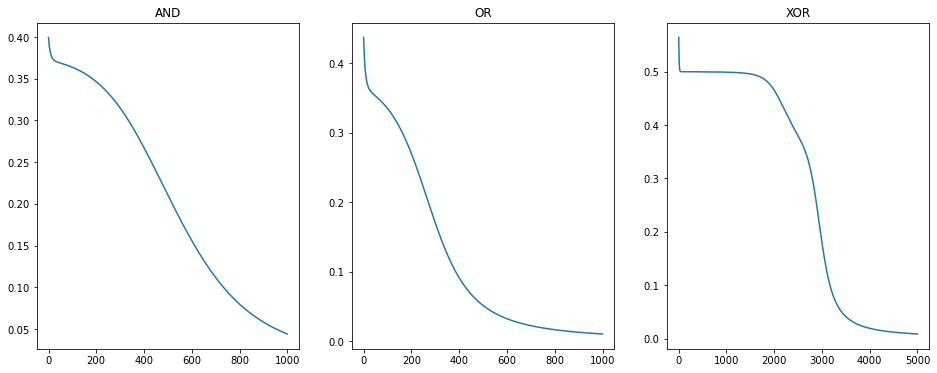

In [7]:
fig = plt.figure(figsize=(16,6))

data = [
    pd.DataFrame(np.array([[0,0,0],[0,1,0],[1,0,0],[1,1,1]]), columns=['x1', 'x2', 'y']), # AND
    pd.DataFrame(np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,1]]), columns=['x1', 'x2', 'y']), # OR
    pd.DataFrame(np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]]), columns=['x1', 'x2', 'y'])  # XOR
]
titles = ['AND', 'OR', 'XOR']
epochs = [1000, 1000, 5000]

for i in range(len(data)):
    ds = my.DataSet(data[i])

    errors = []
    fit(ds.inputs, ds.target, epochs=epochs[i])
    cm = my.confusion_matrix(ds.target, predict(ds.inputs))
    accuracy = np.trace(cm) / np.sum(cm)
    print(cm)
    print(titles[i], 'accuracy: ', accuracy)

    ax = fig.add_subplot(1,3, i + 1)
    ax.plot(errors)
    plt.title(titles[i])

## The MLP class
Let's put all this together into a class named.

In [8]:
class MultilayerPerceptron:
    def __init__(self, dataset, nOutput=1, nHidden=None, eta=.2, epochs=1000):
        self.inputs = dataset.examples.values[:, :-nOutput]
        self.target = dataset.examples.values[:, -nOutput:]
        self.nFeatures = self.inputs.shape[1]
        self.nHidden = self.nFeatures if nHidden == None else nHidden
        self.eta = eta
        self.epochs = epochs
        self.nOutput = nOutput
        self.w = []
        
    def activation_f(self, h):
        return 1.0/(1.0 + np.exp(-h))
    
    def forward(self, X):
        if len(self.w) == 0:
            raise "Need to fit the data first"
        
        X = np.concatenate([np.ones((len(X),1)), X],axis=1)
        
        # Hidden layer 1
        self.a = []
        a0 = self.activation_f(np.dot(X, self.w[0]));
        
        # Adding bias to the hidden nodes
        a0 = np.concatenate([np.ones((len(a0), 1)), a0], axis=1)
        self.a.append(a0)

        return X, self.activation_f(np.dot(self.a[0], self.w[1]))
    
    def backward(self, X, y):
        self.errors.append(0.5* np.sum((y - self.target)**2)) 

        # Calculate the "perceived errors"
        delta_o = (y - self.target) * y *(1.0 - y) 
        delta_h = self.a[0] *(1.0 - self.a[0]) * (np.dot(delta_o, self.w[1].T))

        # Update weights
        self.w[0] -= self.eta * (np.dot(X.T, delta_h[:,1:]))
        self.w[1] -= self.eta * (np.dot(self.a[0].T, delta_o))
        
    def __initialize_weights(self):
        self.w.append((np.random.rand(self.nFeatures + 1, self.nHidden) - 0.5) * 2 / np.sqrt(self.nFeatures))
        self.w.append((np.random.rand(self.nHidden + 1, self.nOutput)-0.5) * 2 / np.sqrt(self.nHidden))
        
    def fit(self):
        self.errors = []
        self.__initialize_weights()
        
        for n in range(self.epochs):
            self.backward(*self.forward(self.inputs))
    
    def predict(self, unseen):
        if unseen.ndim == 1:
            unseen = unseen.reshape(1, len(unseen))

        X, y = self.forward(unseen)
        if self.target.shape[1] ==1:
            return np.where(y > 0.5, 1, 0)
        else:
            return np.argmax(y,1)

Let's test this class on the above logical functions

[[3 0]
 [0 1]]
AND accuracy:  1.0
[[1 0]
 [0 3]]
OR accuracy:  1.0
[[1 1]
 [1 1]]
XOR accuracy:  0.5


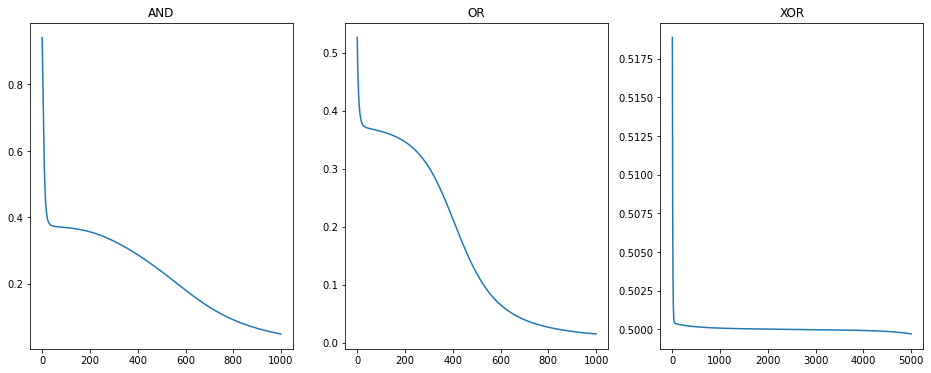

In [9]:
fig = plt.figure(figsize=(16,6))

data = [
    pd.DataFrame(np.array([[0,0,0],[0,1,0],[1,0,0],[1,1,1]]), columns=['x1', 'x2', 'y']), # AND
    pd.DataFrame(np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,1]]), columns=['x1', 'x2', 'y']), # OR
    pd.DataFrame(np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]]), columns=['x1', 'x2', 'y'])  # XOR
]
titles = ['AND', 'OR', 'XOR']
epochs = [1000, 1000, 5000]

for i in range(len(data)):
    ds = my.DataSet(data[i])

    mlp = MultilayerPerceptron(ds, epochs=epochs[i])
    mlp.fit()
    cm = my.confusion_matrix(ds.target, mlp.predict(ds.inputs))
    accuracy = np.trace(cm) / np.sum(cm)
    print(cm)
    print(titles[i], 'accuracy: ', accuracy)

    ax = fig.add_subplot(1,3, i + 1)
    ax.plot(mlp.errors)
    plt.title(titles[i])

## Multiclass classification with MLP
We can use the MLP to perform multiclass classification by having one target column for each class. These target columns are coded using [one-hot encoding](https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding).

In [10]:
data = sns.load_dataset("iris")
data.iloc[:, -1] = data.iloc[:, -1].apply(lambda x: 0 if x == 'setosa' else (1 if x == 'versicolor' else 2))

ds = my.DataSet(data, y=True)

datasets = ds.train_test_split(test_portion=.25, shuffle=True)

dfs = []
inputs = []
targets = []
for i in range(len(datasets)):
    df = datasets[i].examples
    t_df = pd.DataFrame({
        'y1': df.iloc[:, -1].apply(lambda x: 1 if x == 0 else 0),
        'y2': df.iloc[:, -1].apply(lambda x: 1 if x == 1 else 0),
        'y3': df.iloc[:, -1].apply(lambda x: 1 if x == 2 else 0)
    })

    full_df = pd.concat([df.iloc[:, :-1], t_df], axis=1)
    inputs.append(full_df.values[:,:4])
    targets.append(full_df.values[:,4:])
    dfs.append(full_df)
    
mlp = MultilayerPerceptron(my.DataSet(dfs[0]), nHidden=15, nOutput=3, epochs=1000, eta=.01)
mlp.fit()

cm = my.confusion_matrix(datasets[0].target, mlp.predict(inputs[0]))
accuracy = np.trace(cm) / np.sum(cm)
print(cm)
print('Training accuracy: ', accuracy)

cm = my.confusion_matrix(datasets[1].target, mlp.predict(inputs[1]))
accuracy = np.trace(cm) / np.sum(cm)
print(cm)
print('Testing accuracy: ', accuracy)

[[38  0  0]
 [ 0 37  2]
 [ 0  0 36]]
Training accuracy:  0.9823008849557522
[[12  0  0]
 [ 0 11  0]
 [ 0  1 13]]
Testing accuracy:  0.972972972972973


## CHALLENGE
* Train the MLP class above on a modified version of the iris dataset with only the sepal_length and  petal_length as input. Plot the decision regions for both the training and test data points.
* Plot the training and test errors as a function of the `nHidden` parameter(number of nodes in the hidden layer).
* Plot the training and test errors as a function of the `eta` learning rate.